In [1]:
import pandas as pd

# Load the dataset
file_path = '202304SL_WaterSampleTimeSeries.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Sample,Sample#,ElapsedHours,Date collected,Time collected,DateTime,Chlorophyll_RFU,Depth_m,fDOM_RFU,ODO_PerLocSat,...,Cu_ug_L,Mn_ug_L,Pb_ug_L,Se_ug_L,Tl_ug_L,CIBE_%,Calcite_log_QoverK,Dolomite_log_QoverK,Diss_O2_bar,Diss_CO2_bar
0,SL-01,0,0,3/31/2023,16:00,3/31/2023 16:00,0.58,0.331,7.95,119.7,...,1.14,5.02,0.16,0.00,0.49,5.45%,-0.2644,-0.06921,0.2376,0.000327
1,SL-02,1,3,3/31/2023,19:00,3/31/2023 19:00,0.80,0.323,7.88,117.1,...,0.82,1.18,0.04,0.00,0.42,8.10%,-0.3753,-0.28760,0.2323,0.000428
2,SL-03,2,6,3/31/2023,22:00,3/31/2023 22:00,0.69,0.306,7.84,109.9,...,0.65,1.69,0.03,0.00,0.71,8.96%,-0.5761,-0.69800,0.2180,0.000748
3,SL-04,3,9,4/1/2023,1:00,4/1/2023 1:00,0.68,0.314,7.80,103.7,...,1.35,6.39,0.03,0.01,0.24,10.74%,-0.6991,-0.94930,0.2055,0.001069
4,SL-05,4,12,4/1/2023,4:00,4/1/2023 4:00,0.44,0.310,7.75,85.5,...,0.88,7.85,0.02,0.01,0.31,12.54%,-1.0260,-1.60500,0.1696,0.001952


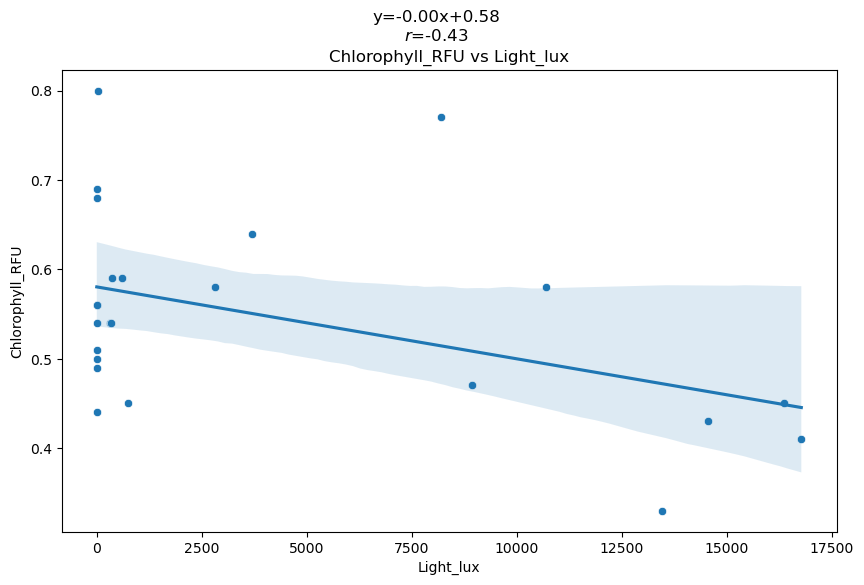

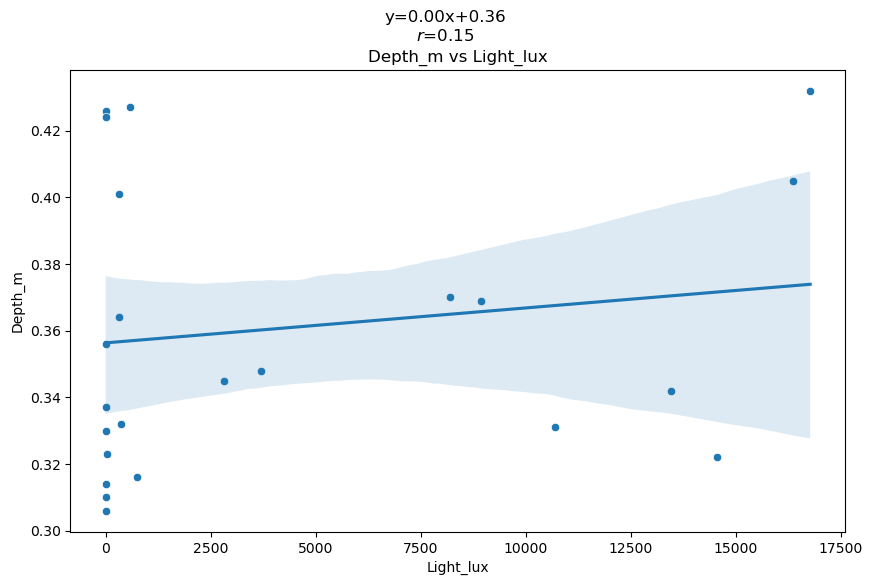

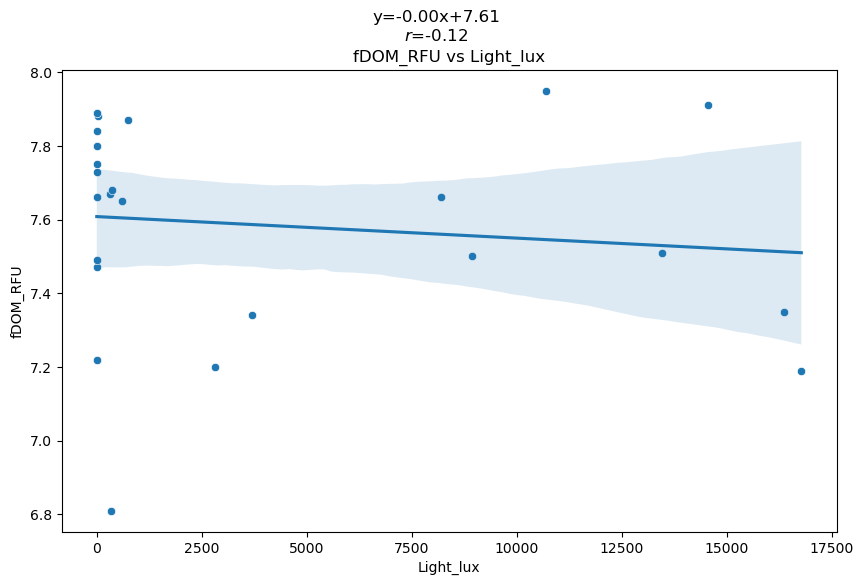

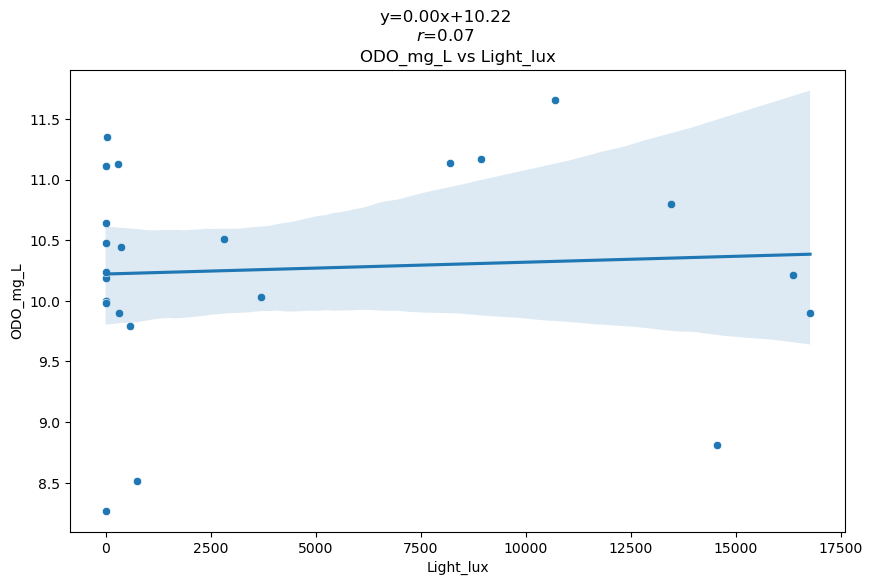

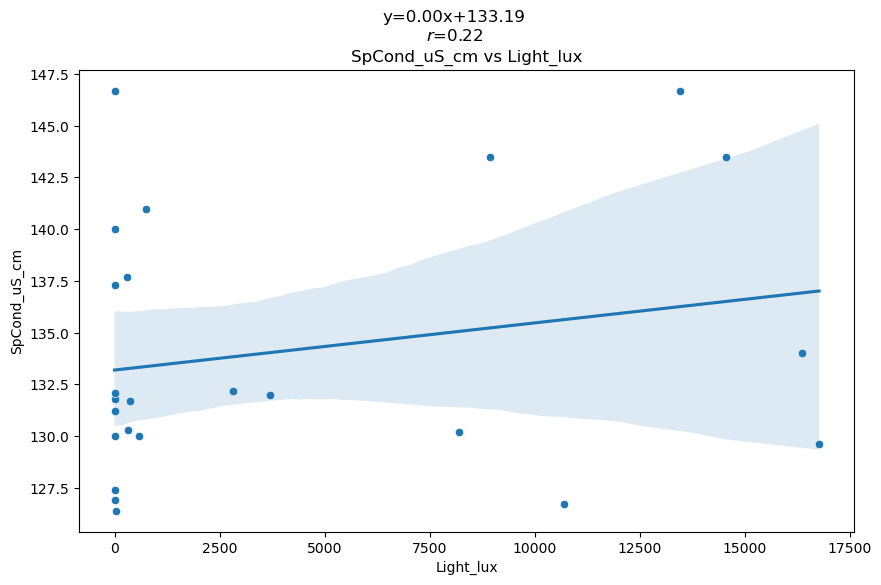

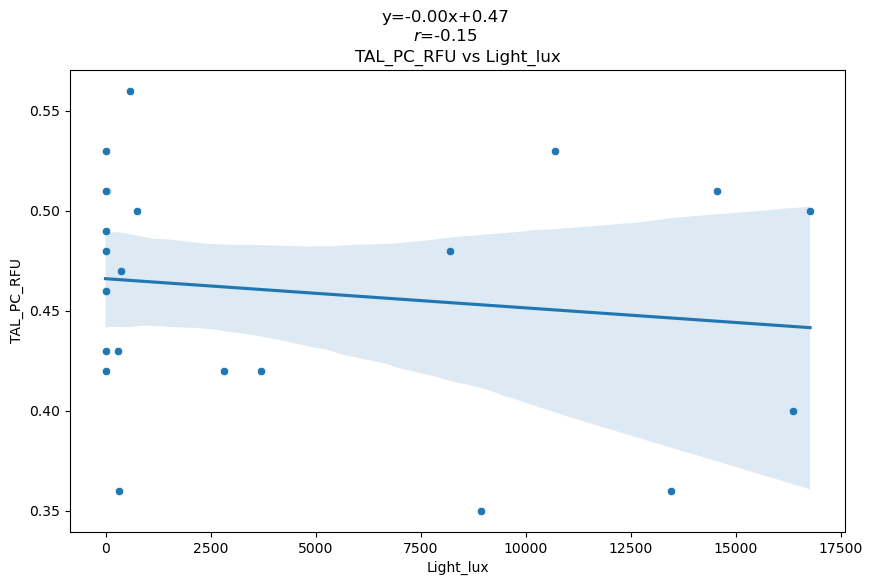

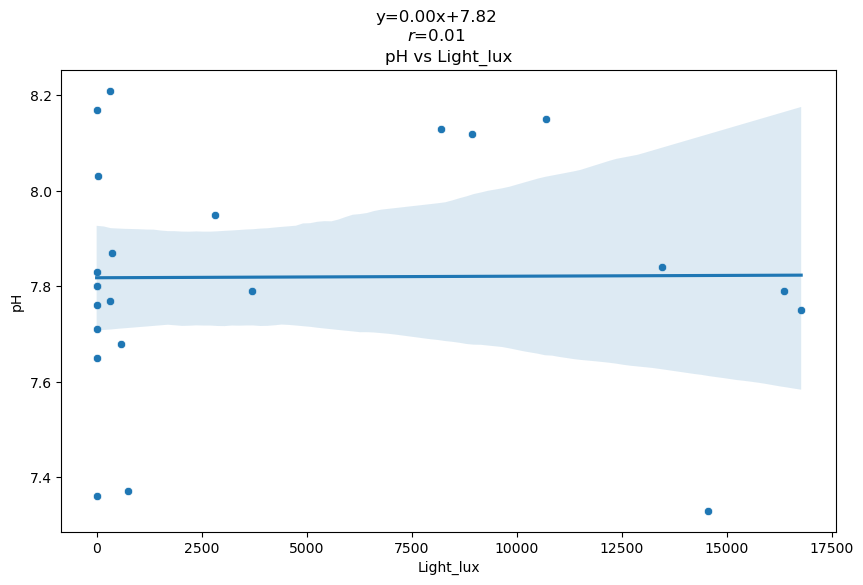

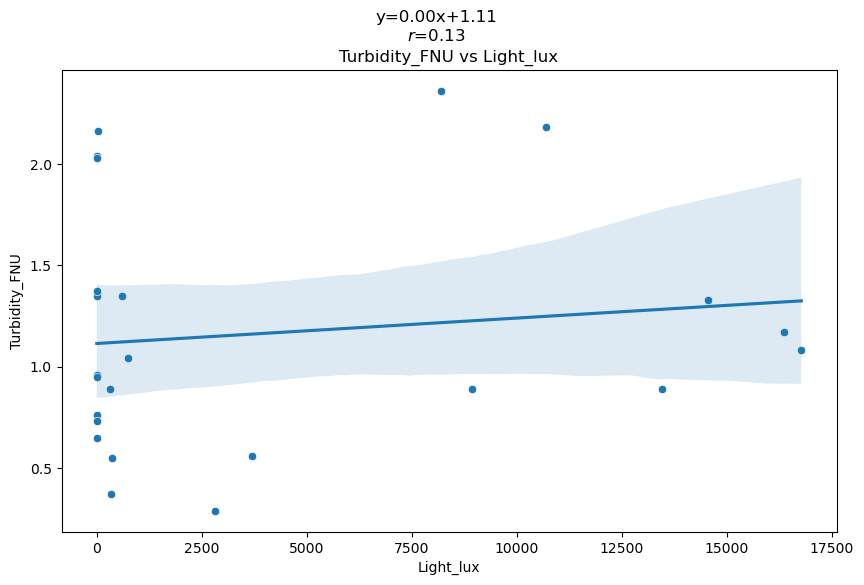

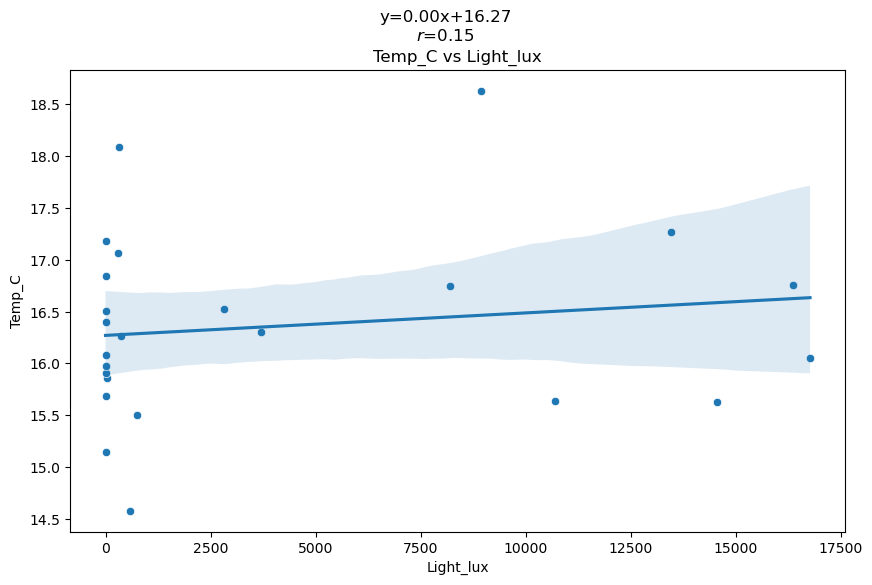

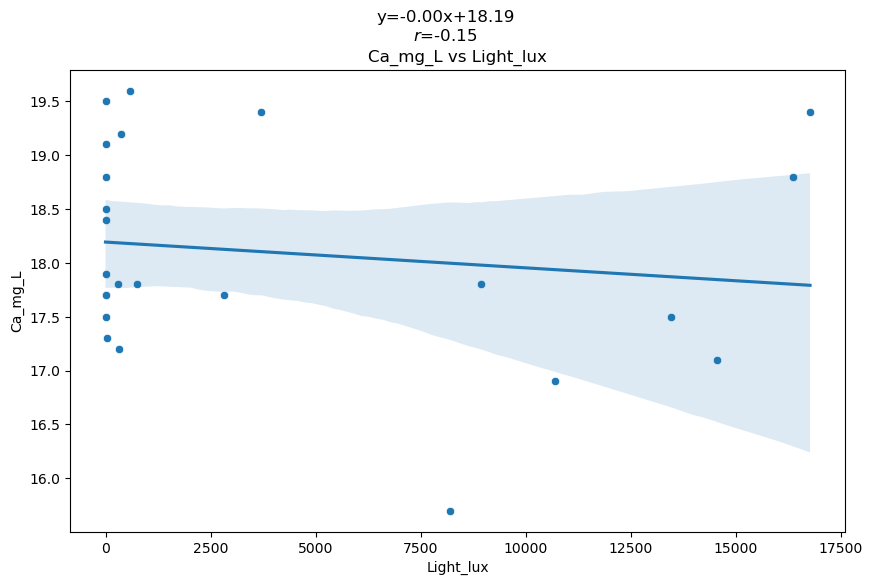

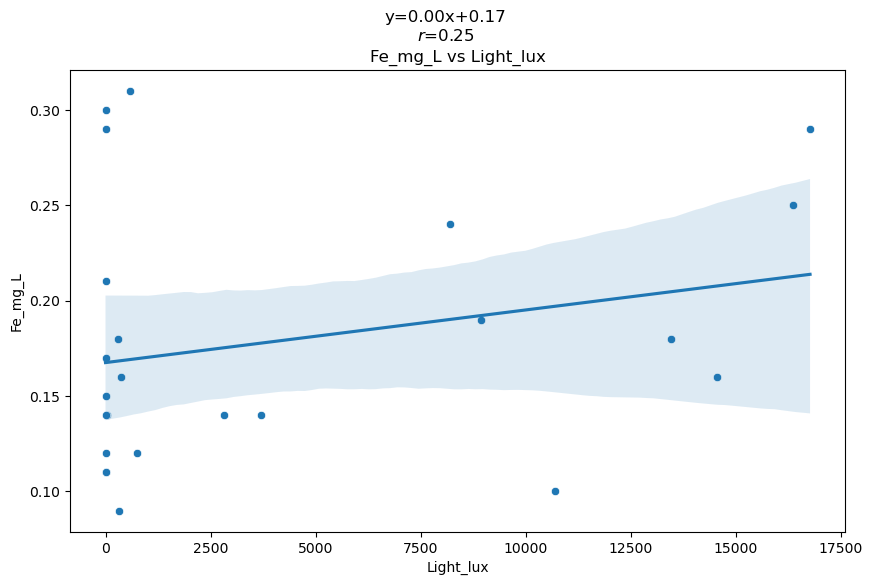

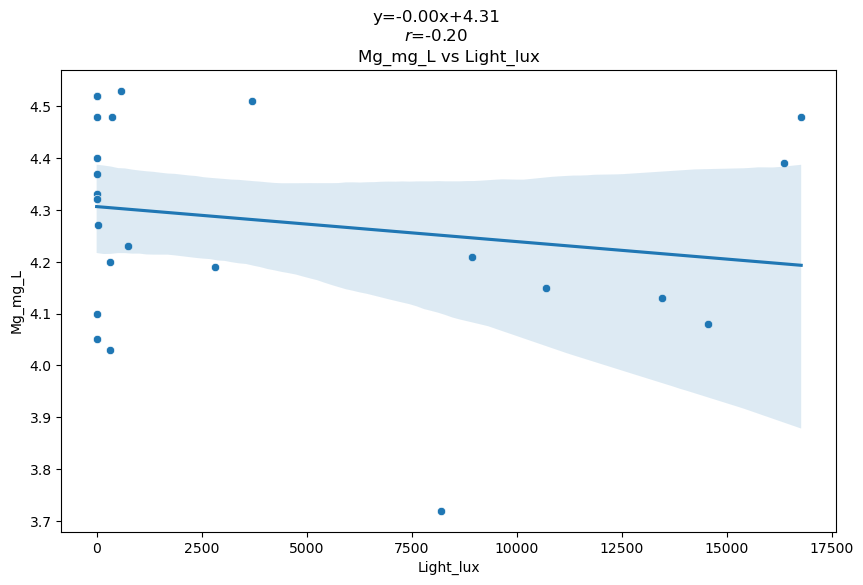

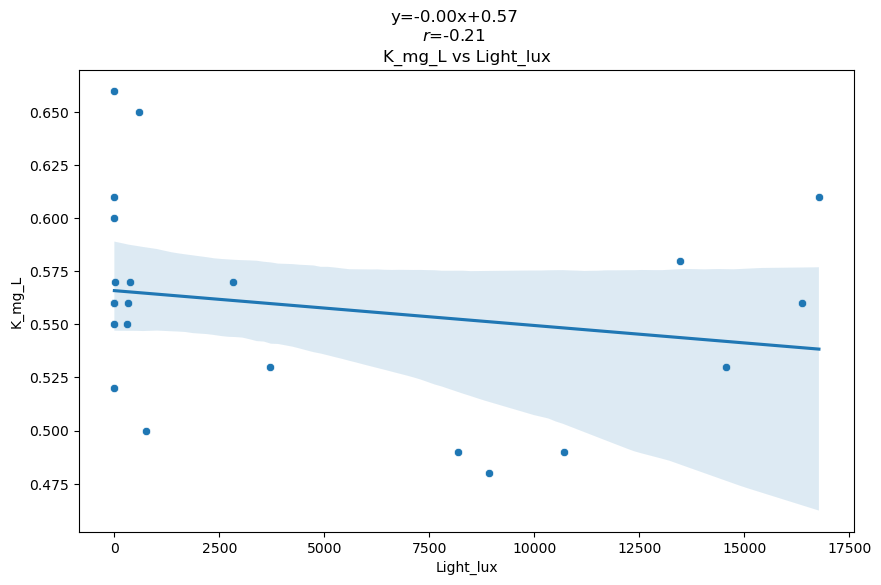

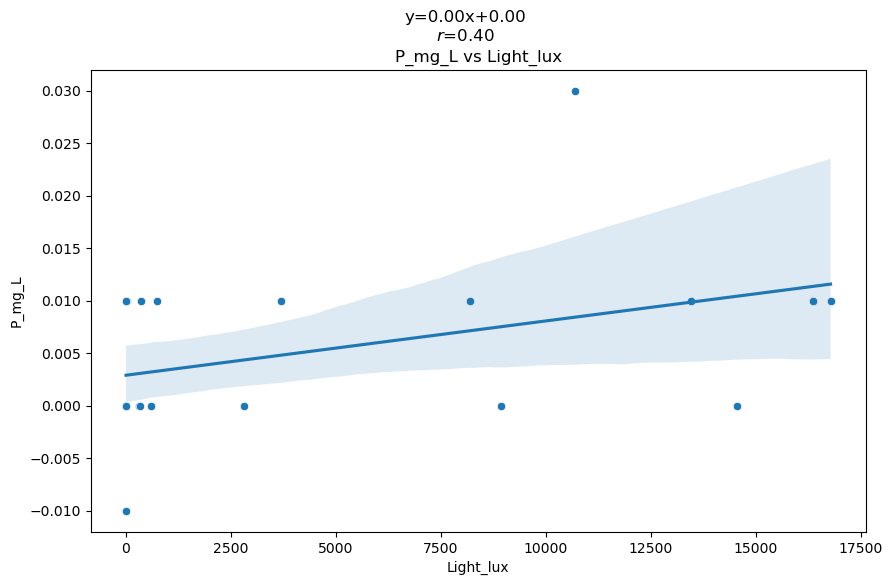

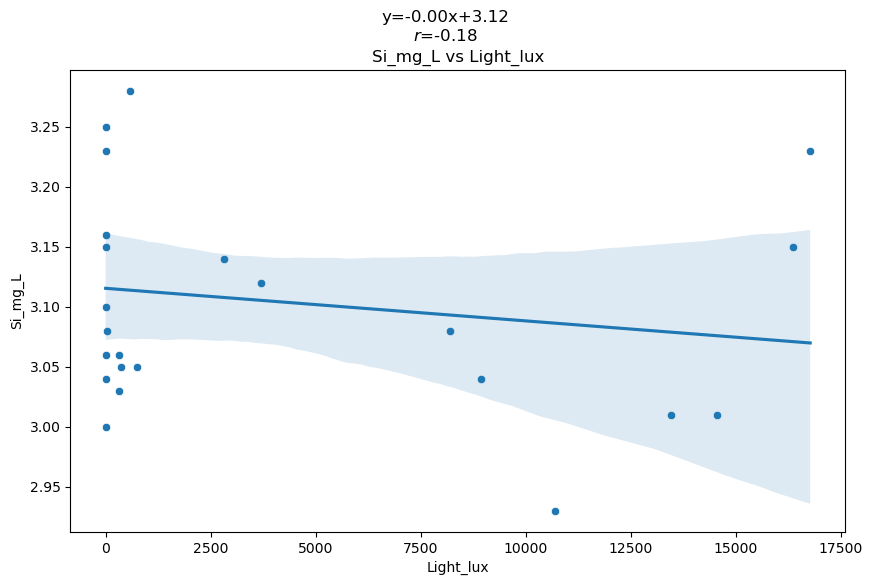

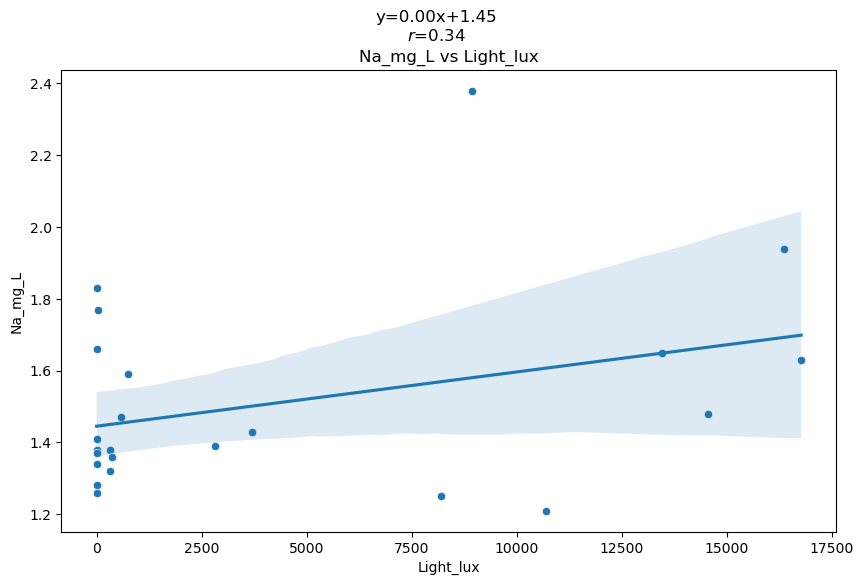

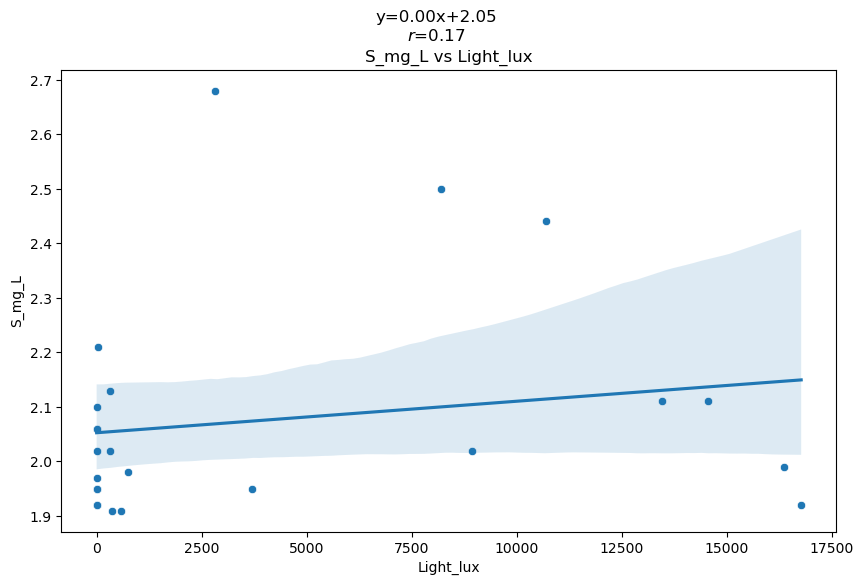

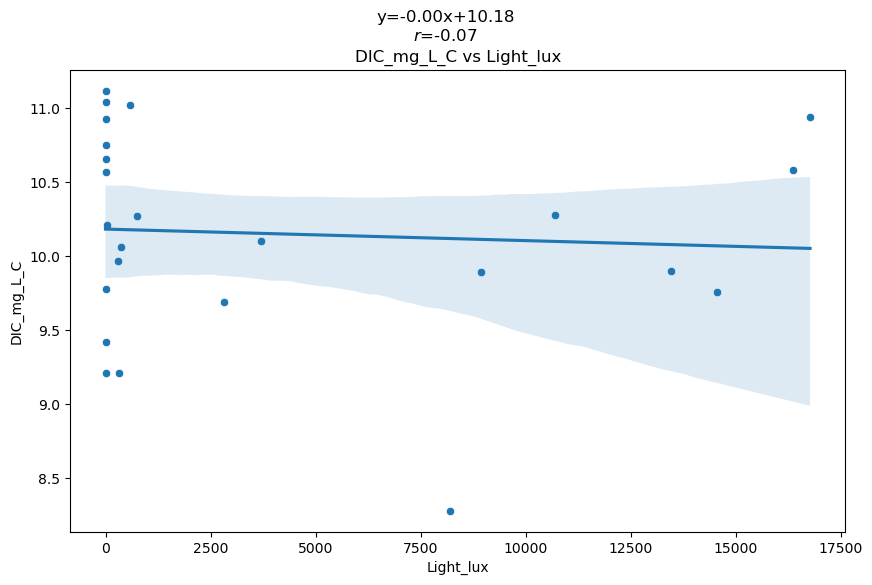

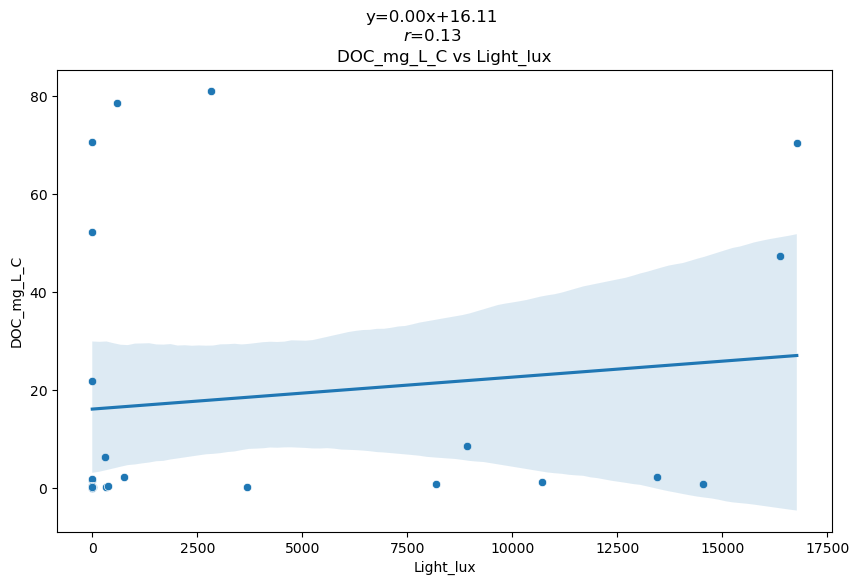

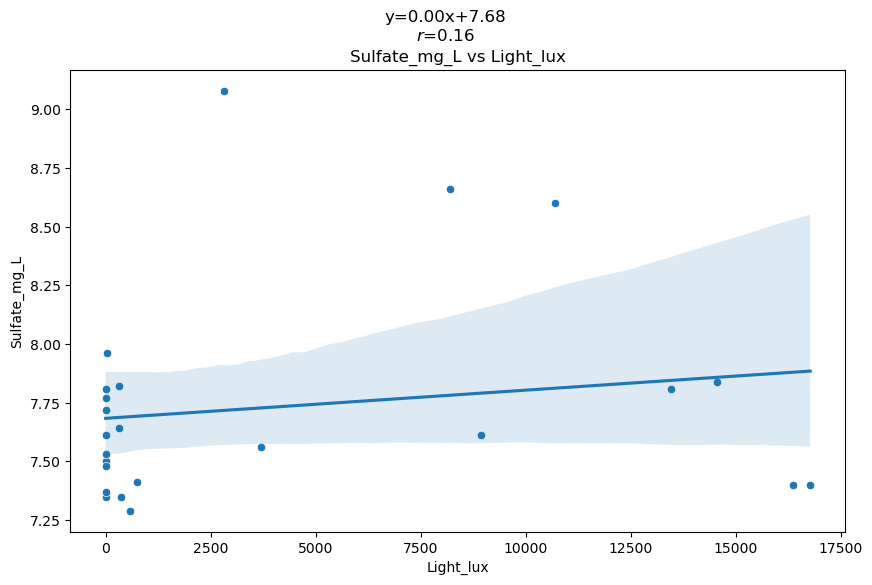

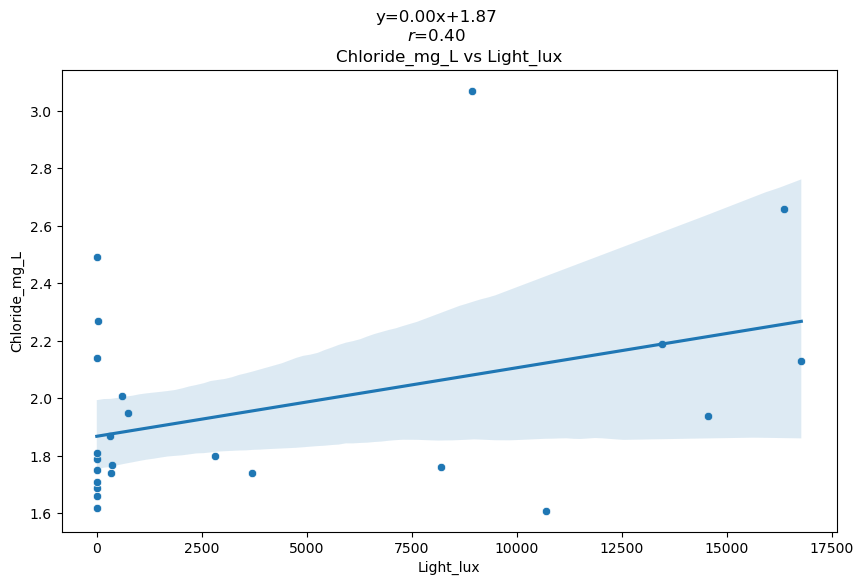

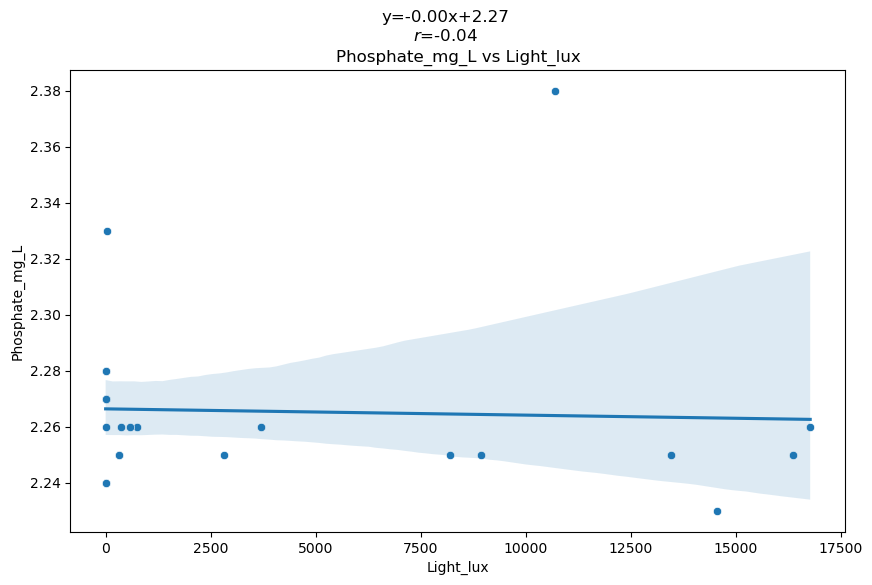

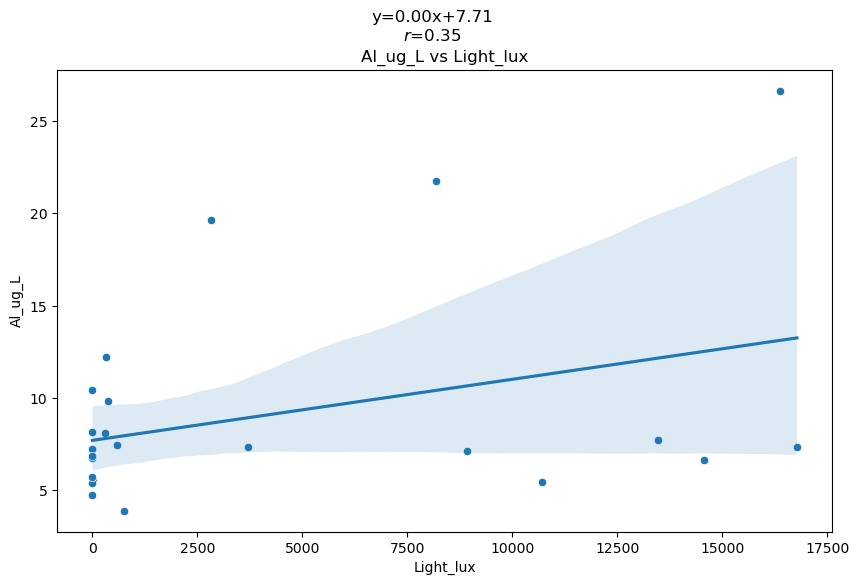

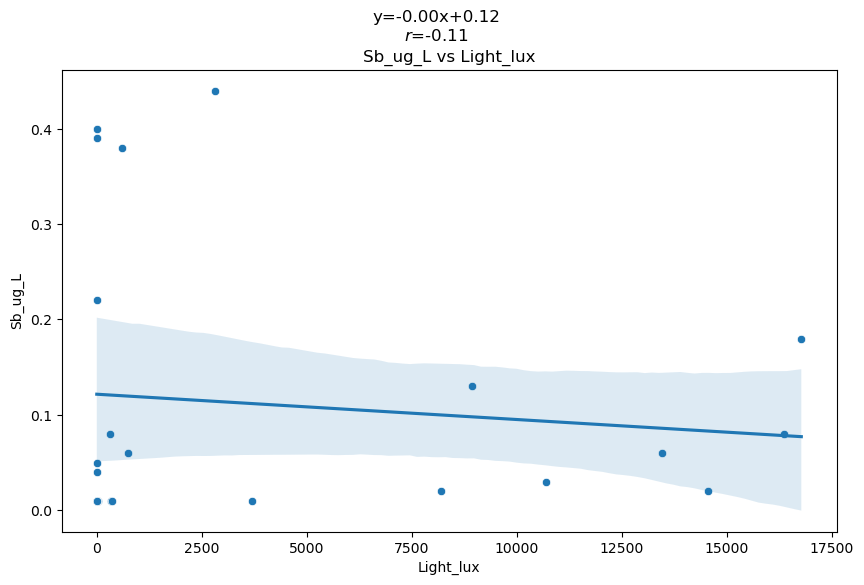

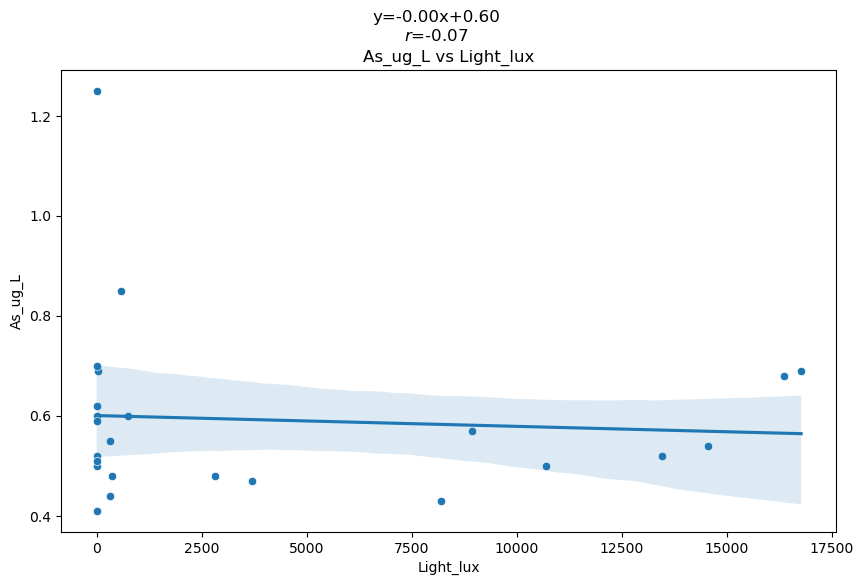

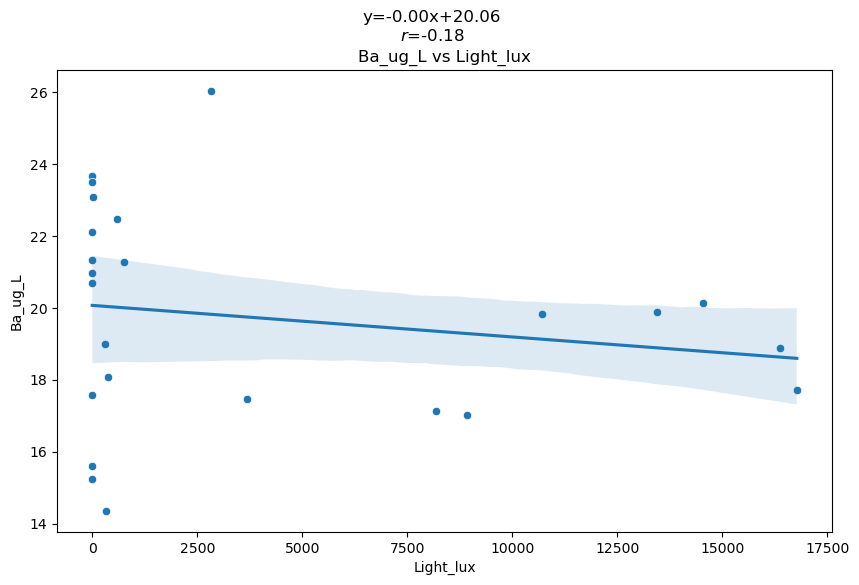

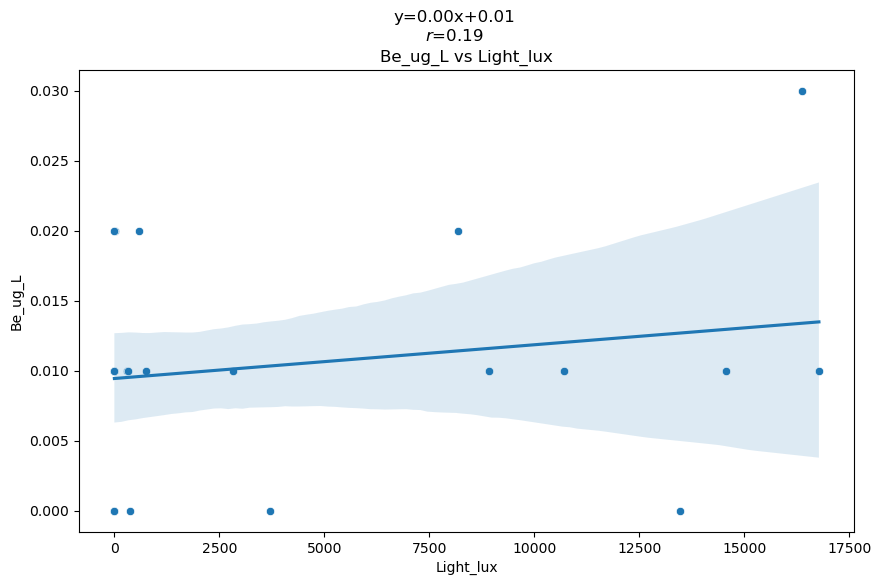

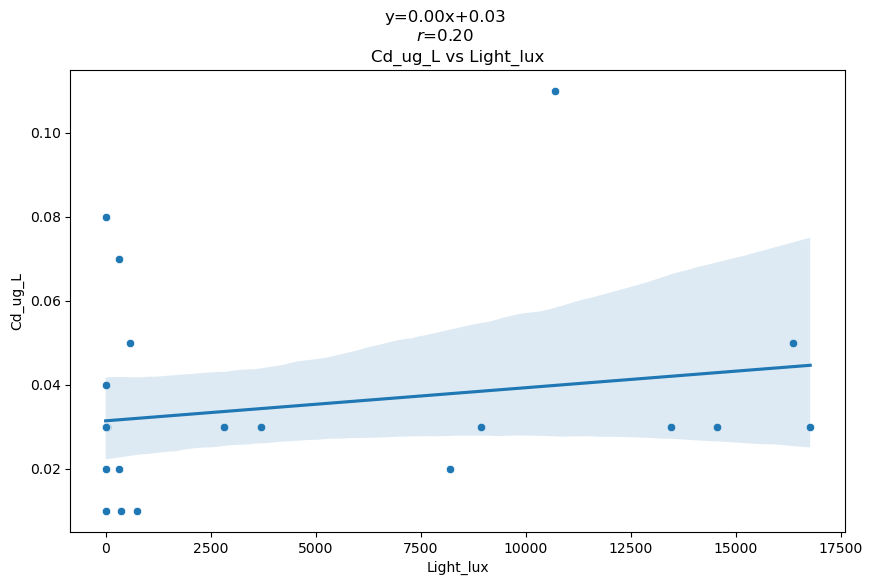

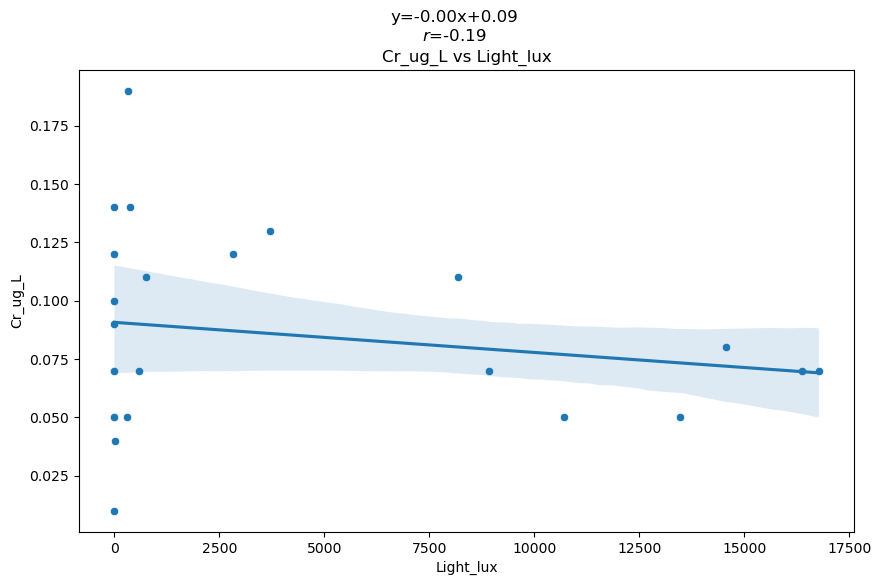

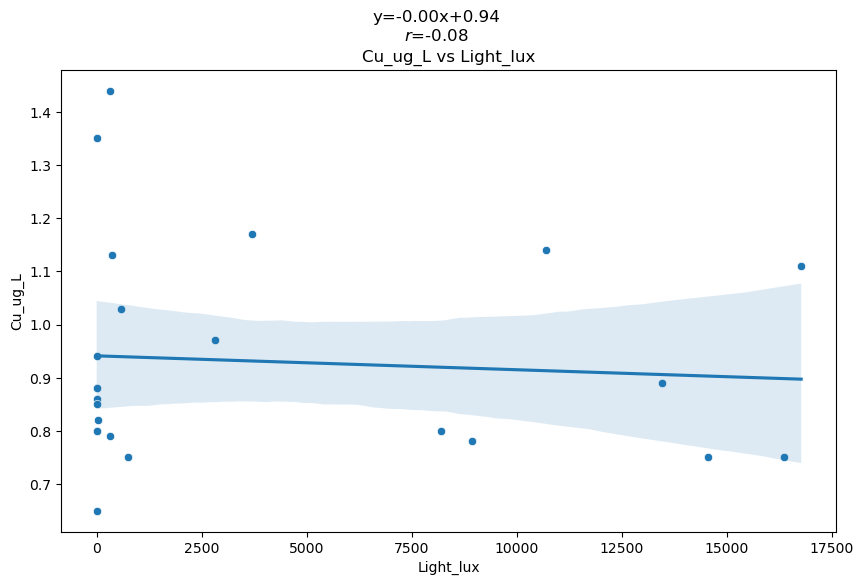

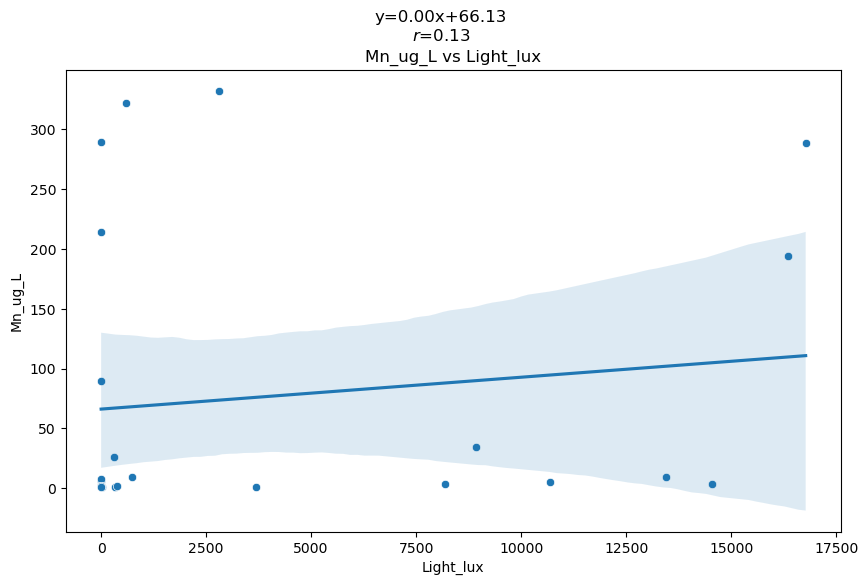

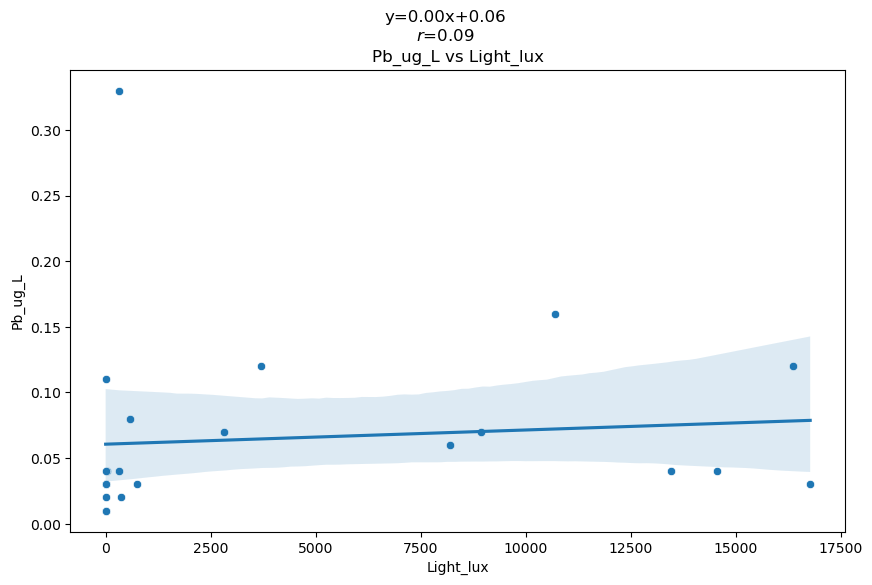

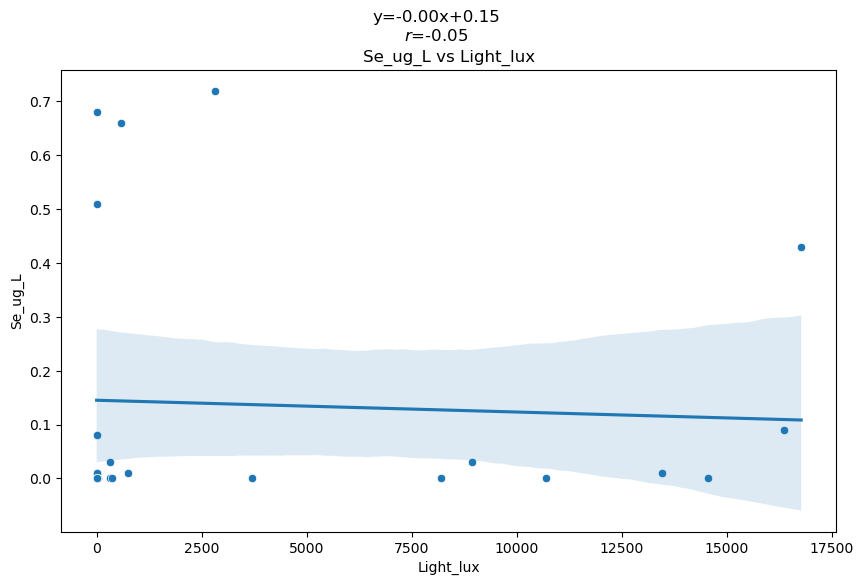

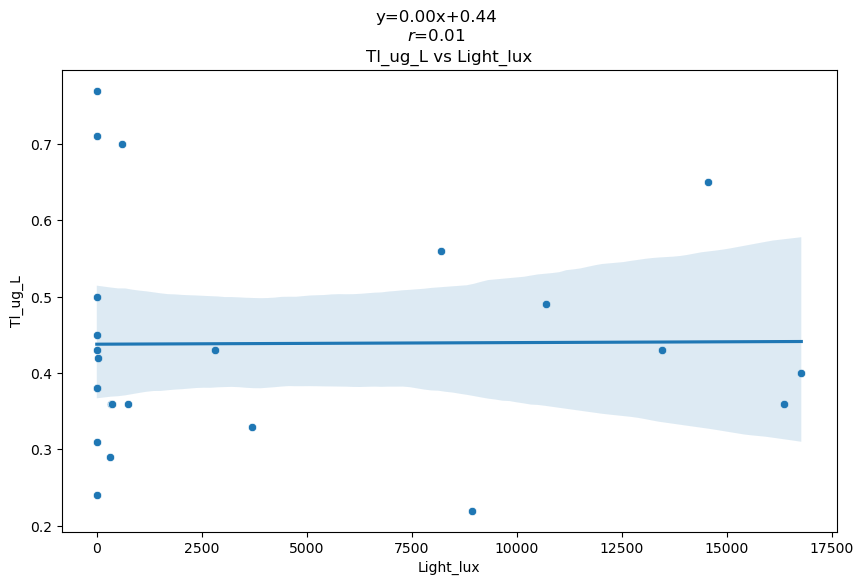

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import os
import zipfile

# Create a directory to store all PNG files
png_dir = 'scatterplots_png/'
os.makedirs(png_dir, exist_ok=True)

# List of variables to plot against Light_lux
variables_to_plot = [
    'Chlorophyll_RFU', 'Depth_m', 'fDOM_RFU', 'ODO_mg_L', 'SpCond_uS_cm', 
    'TAL_PC_RFU', 'pH', 'Turbidity_FNU', 'Temp_C', 'Ca_mg_L', 'Fe_mg_L', 
    'Mg_mg_L', 'K_mg_L', 'P_mg_L', 'Si_mg_L', 'Na_mg_L', 'S_mg_L', 
    'DIC_mg_L_C', 'DOC_mg_L_C', 'Sulfate_mg_L', 'Chloride_mg_L', 
    'Phosphate_mg_L', 'Al_ug_L', 'Sb_ug_L', 'As_ug_L', 'Ba_ug_L', 'Be_ug_L', 
    'Cd_ug_L', 'Cr_ug_L', 'Cu_ug_L', 'Mn_ug_L', 'Pb_ug_L', 'Se_ug_L', 
    'Tl_ug_L'
]

# Function to create scatterplot with regression line
def create_scatterplot(x, y, data, variable_name):
    # Perform linear regression
    regression_result = linregress(data[x], data[y])
    slope, intercept, r_value, p_value, std_err = regression_result
    line_kws = {'label': f"y={slope:.2f}x+{intercept:.2f}  $r$={r_value:.2f}"}

    # Create scatterplot
    plt.figure(figsize=(10, 6))
    scatterplot = sns.scatterplot(x=x, y=y, data=data)
    sns.regplot(x=x, y=y, data=data, scatter=False, line_kws=line_kws)

    # Add the regression line equation and the correlation coefficient to the plot
    plt.title(f"{variable_name} vs Light_lux")
    plt.suptitle(f"y={slope:.2f}x+{intercept:.2f}\n$r$={r_value:.2f}", y=0.98)
    plt.xlabel('Light_lux')
    plt.ylabel(variable_name)

    # Save the plot as a PNG file
    plt.savefig(f"{png_dir}{variable_name}_vs_Light_lux.png")
    plt.show()
    # plt.close()

# Create scatterplots for each variable
for variable in variables_to_plot:
    create_scatterplot('Light_lux', variable, data, variable)

# Now let's create a ZIP file with all the PNG files
# zipfile_path = 'scatterplots.zip'
# with zipfile.ZipFile(zipfile_path, 'w') as zipf:
#     for root, dirs, files in os.walk(png_dir):
#         for file in files:
#             zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(png_dir, '..')))

# zipfile_path

test cross correlation for each series for different lags of light_lux. Plot these cross-correlation coefficients for each series, then save plots as png files and combine them into a compressed zip file

In [9]:
from statsmodels.tsa.stattools import ccf

# Define the maximum lag as a fraction of the length of the time series
max_lag = data.shape[0] // 3

# Initialize a dictionary to store cross-correlation results
cross_correlation_results = {}

# Calculate cross-correlation for each variable with Light_lux for different lags
for variable in variables_to_plot:
    # Ensure the series has no NaN values
    series1 = data['Light_lux'].dropna()
    series2 = data[variable].dropna()
    
    # Synchronize series lengths
    min_length = min(len(series1), len(series2))
    series1 = series1[:min_length]
    series2 = series2[:min_length]

    # Calculate cross-correlation function between Light_lux and the current variable
    cross_correlation_results[variable] = ccf(series1, series2, adjusted=False)[:max_lag]

# Since the output can be large, let's only show the first 5 lags for the first 3 variables for brevity
{variable: cross_correlations[:5] for variable, cross_correlations in list(cross_correlation_results.items())[:3]}


{'Chlorophyll_RFU': array([-0.43021801, -0.43787191, -0.2804623 , -0.05563541,  0.11360283]),
 'Depth_m': array([0.14678092, 0.18653359, 0.1271586 , 0.08882985, 0.05872482]),
 'fDOM_RFU': array([-0.12261745, -0.02891922,  0.14599448,  0.28552039,  0.31127725])}

/tmp/ipykernel_119/1858837793.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(max_lag), cross_correlations, use_line_collection=True)


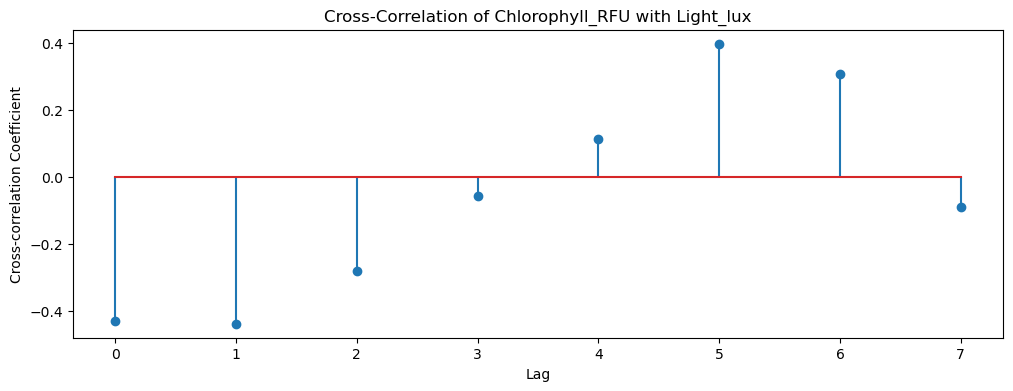

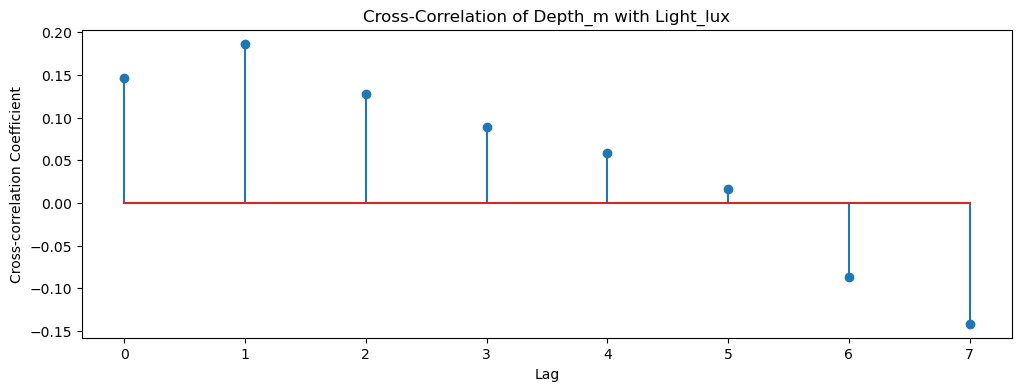

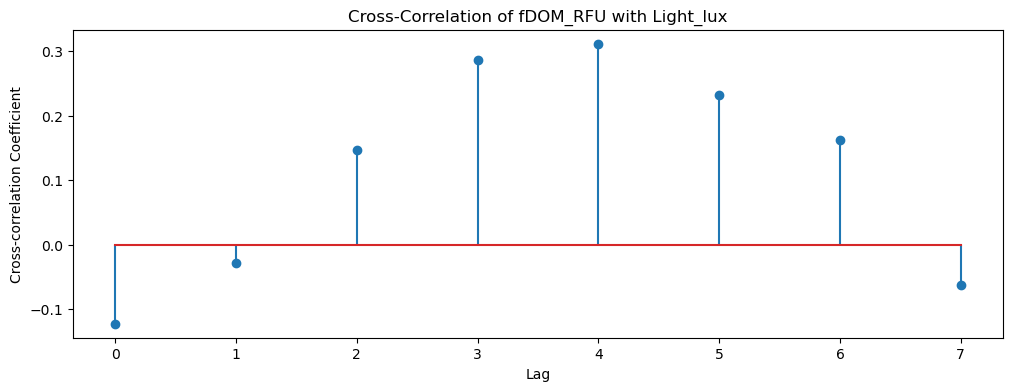

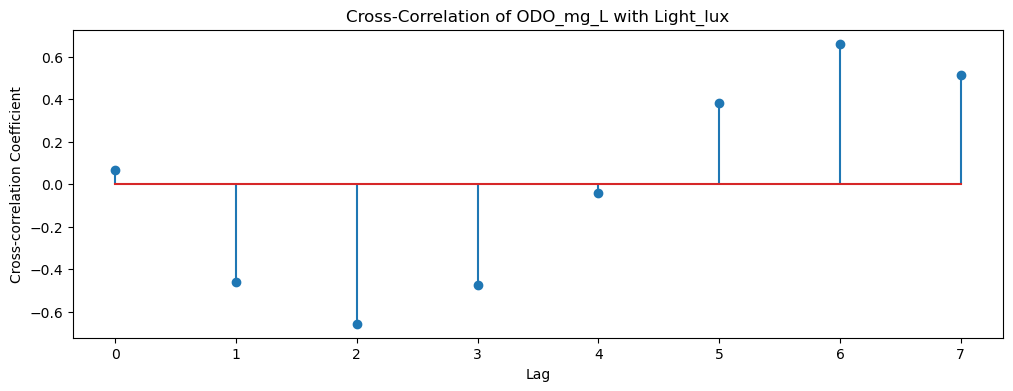

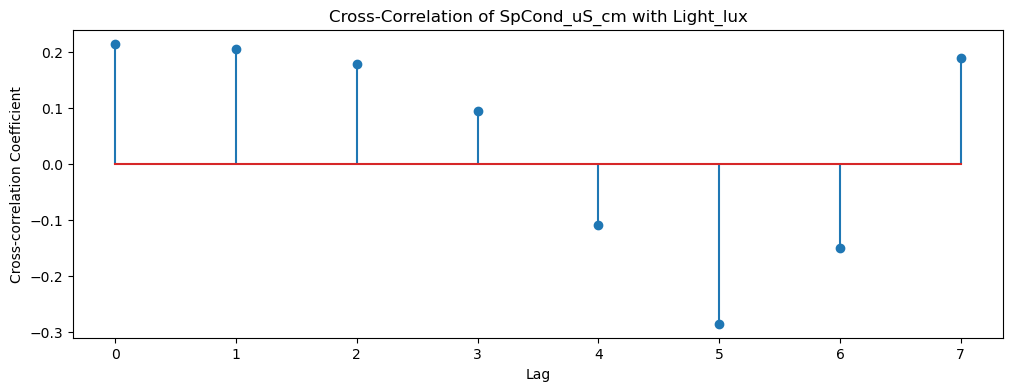

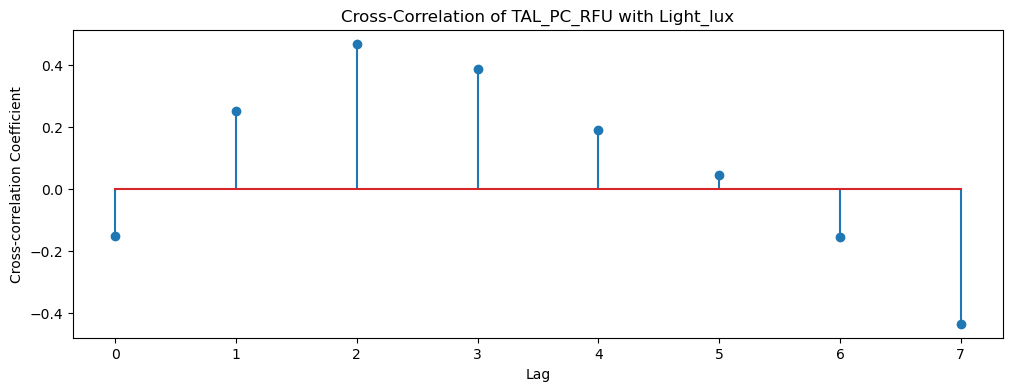

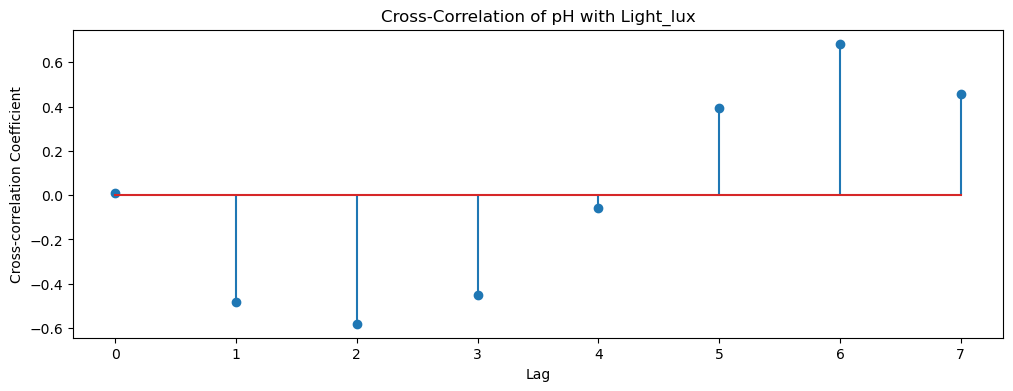

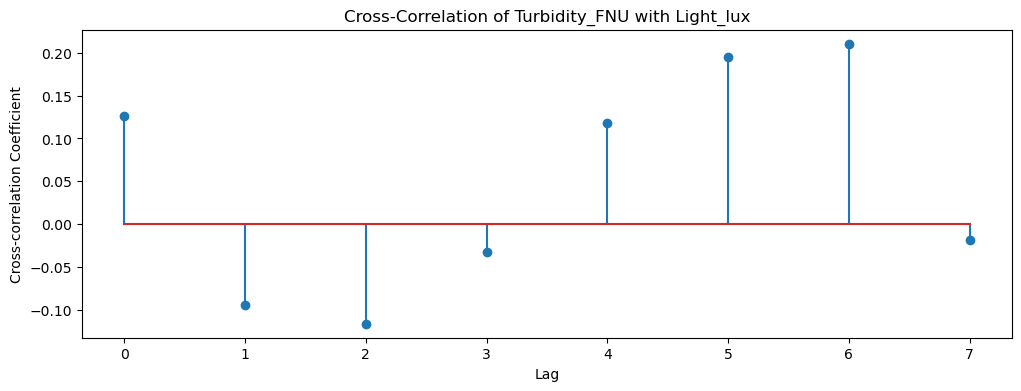

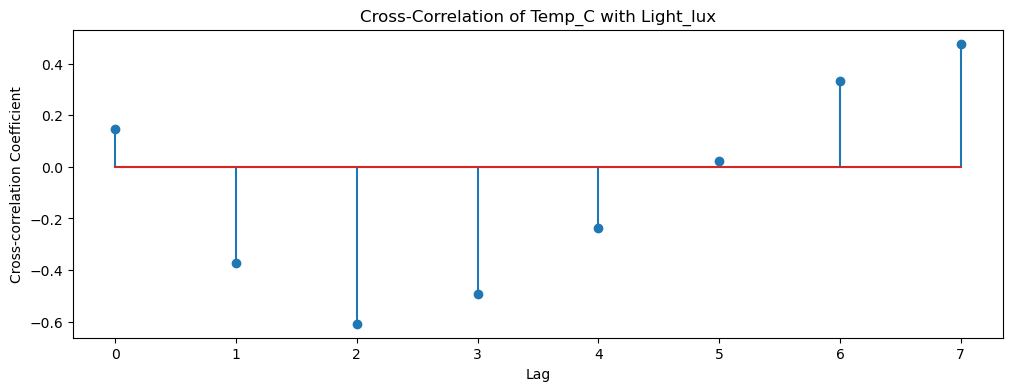

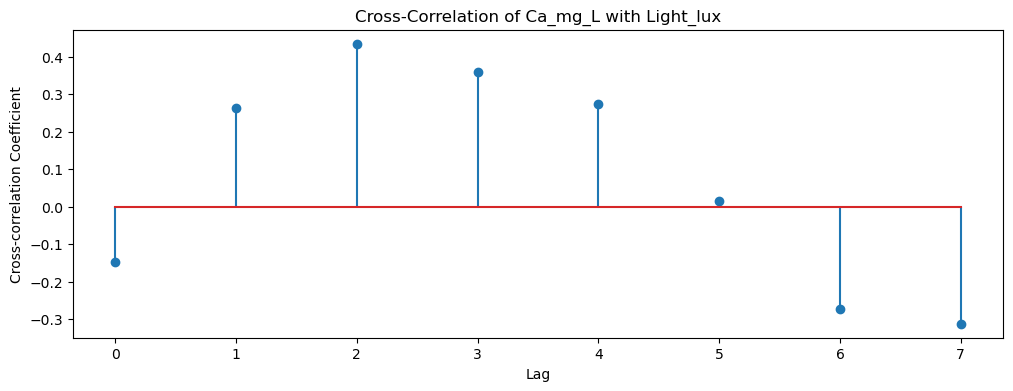

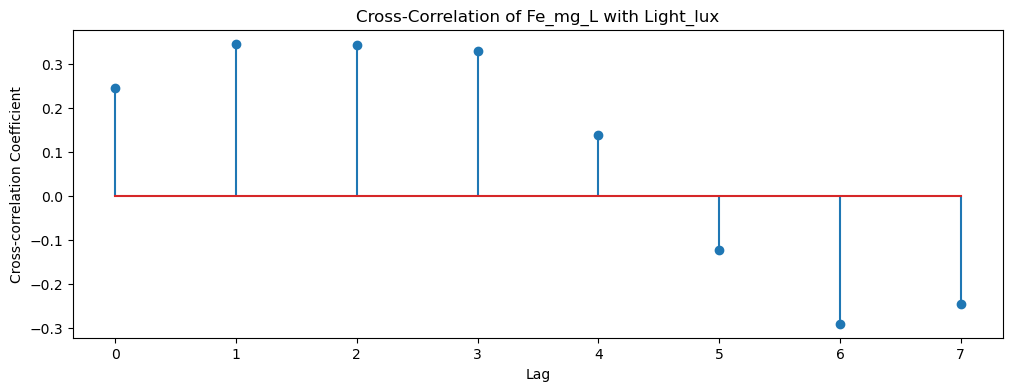

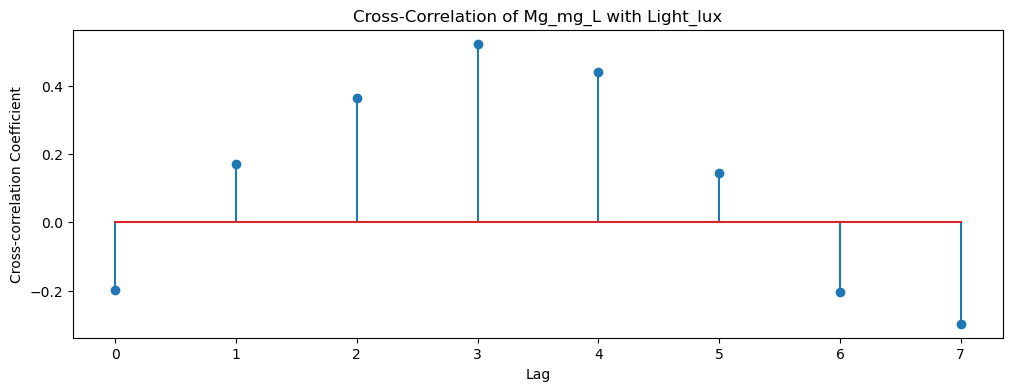

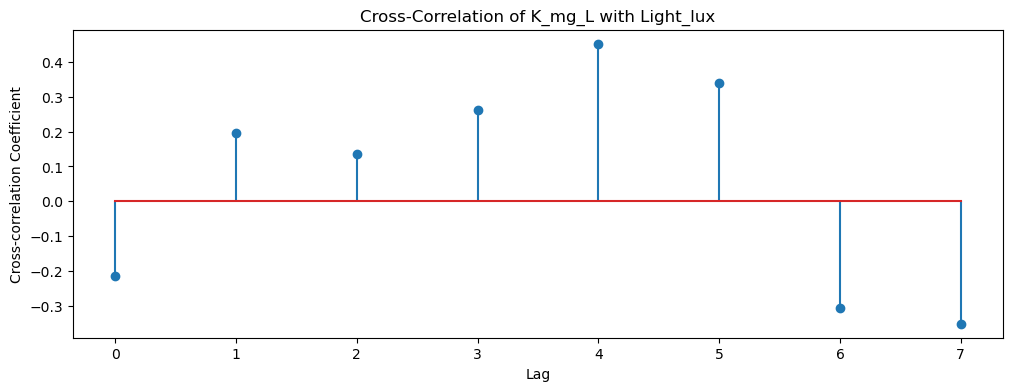

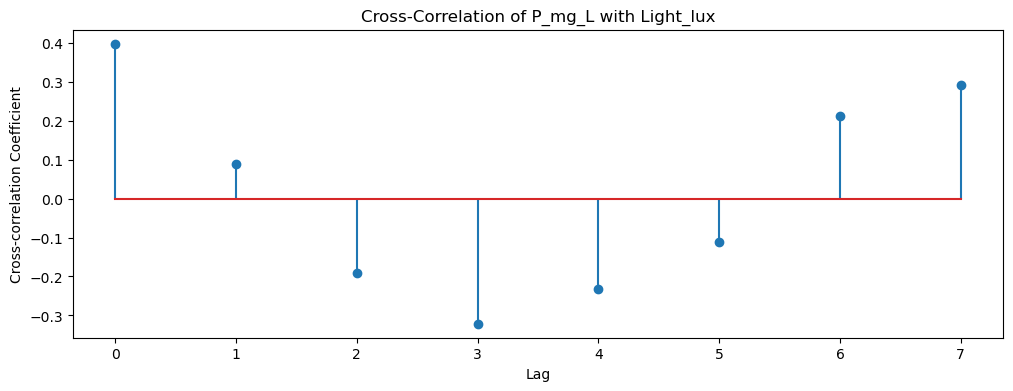

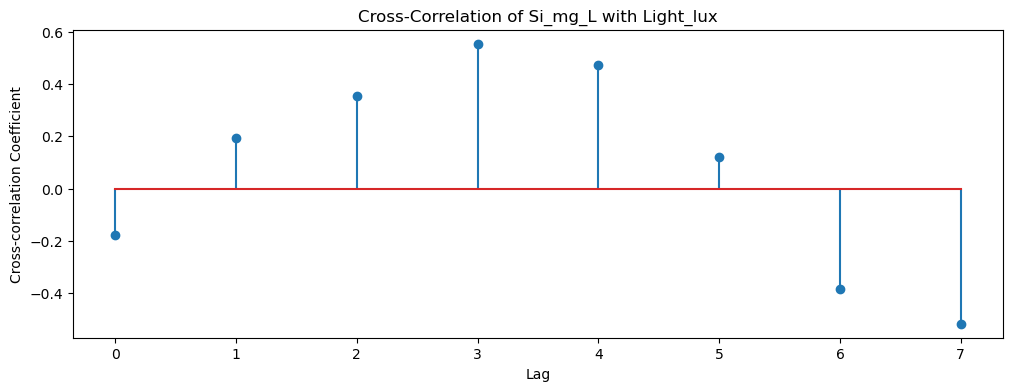

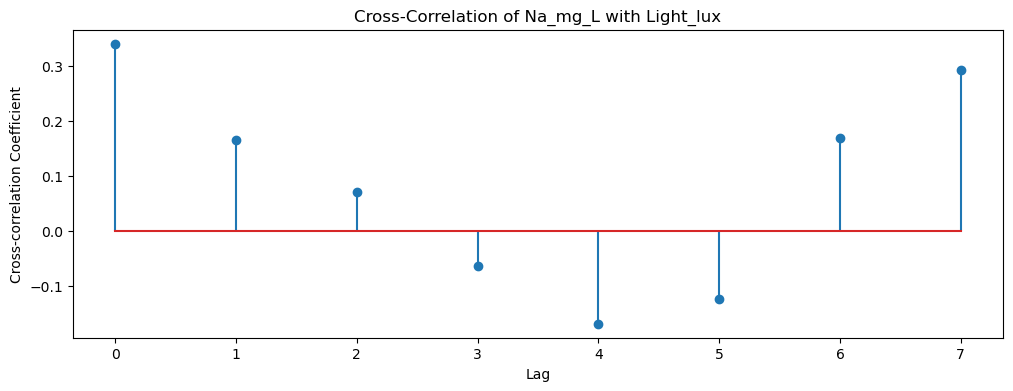

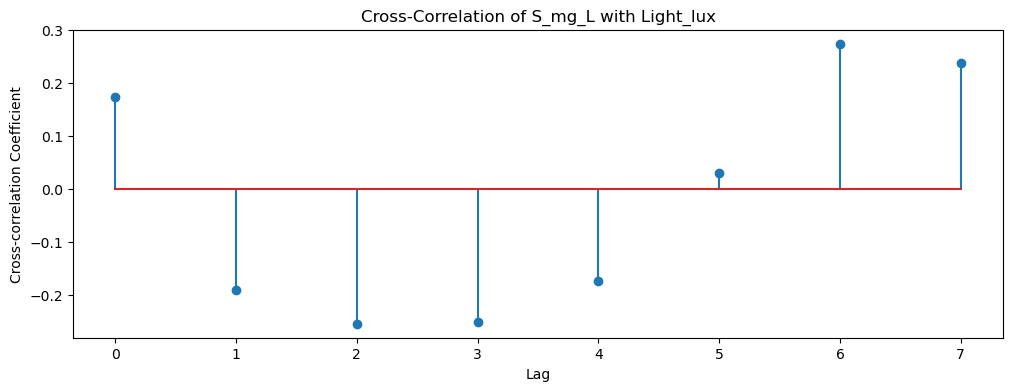

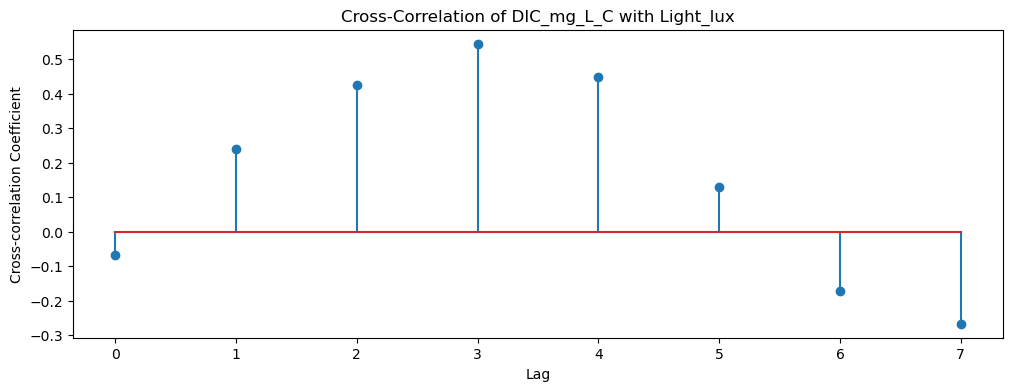

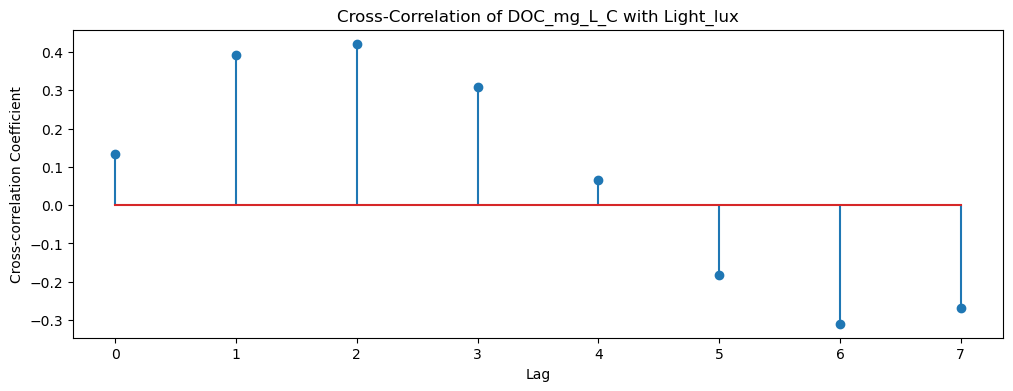

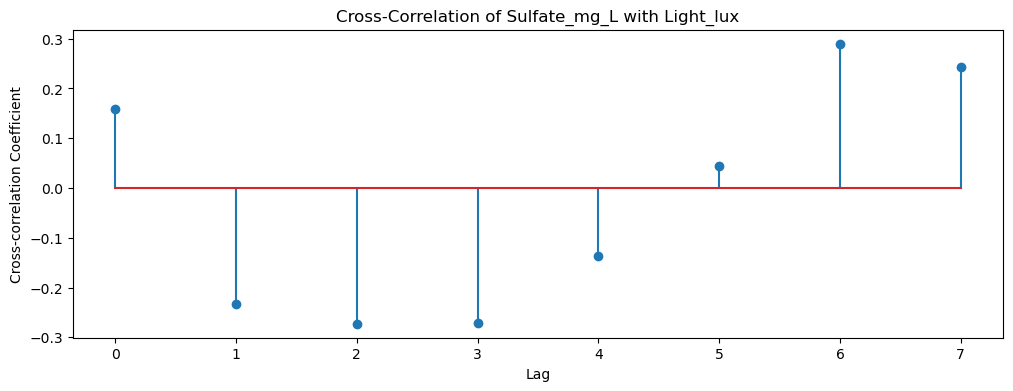

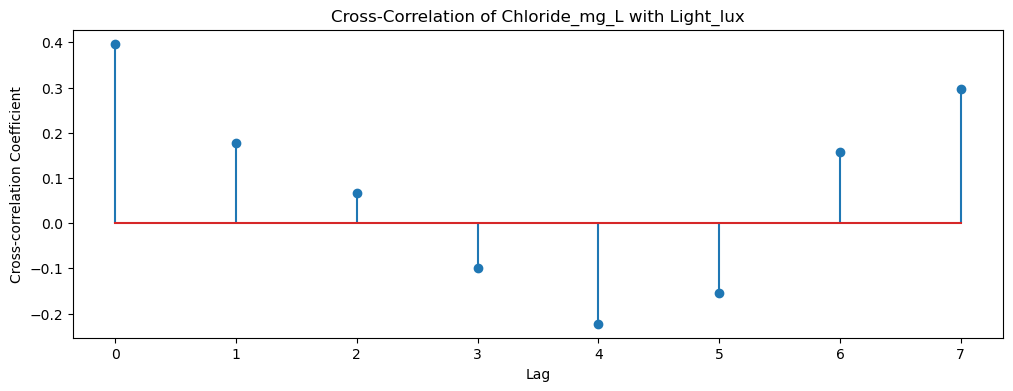

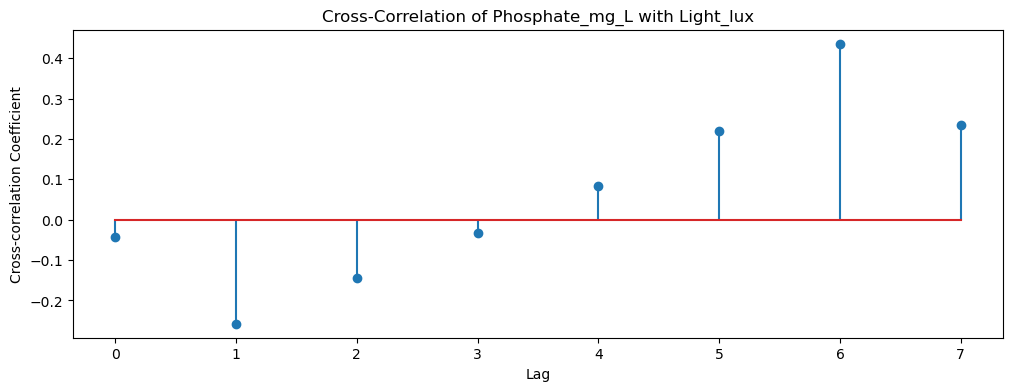

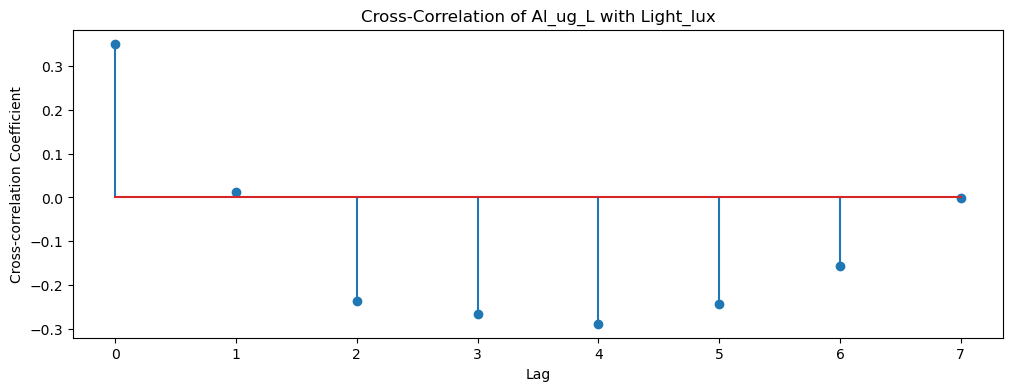

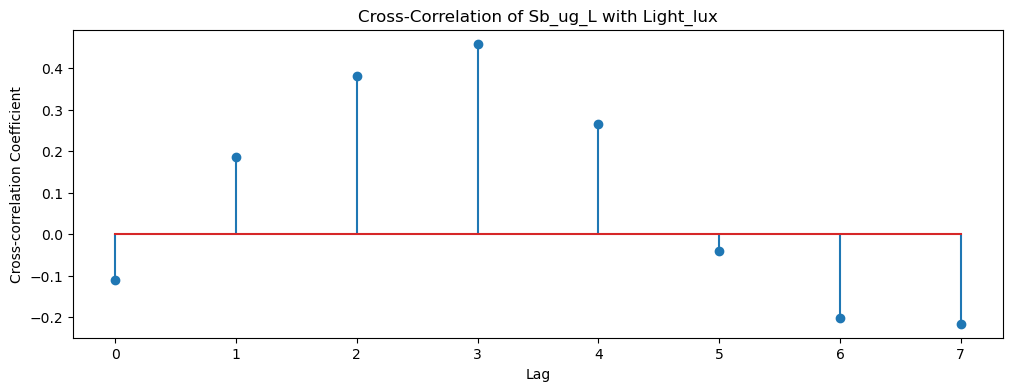

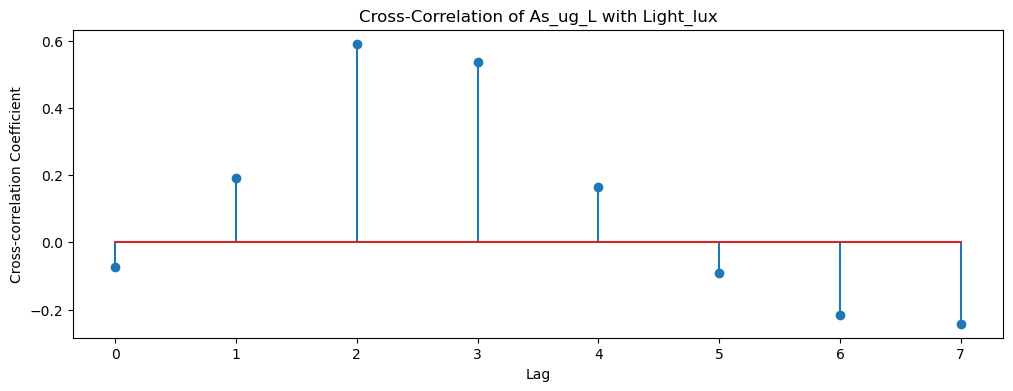

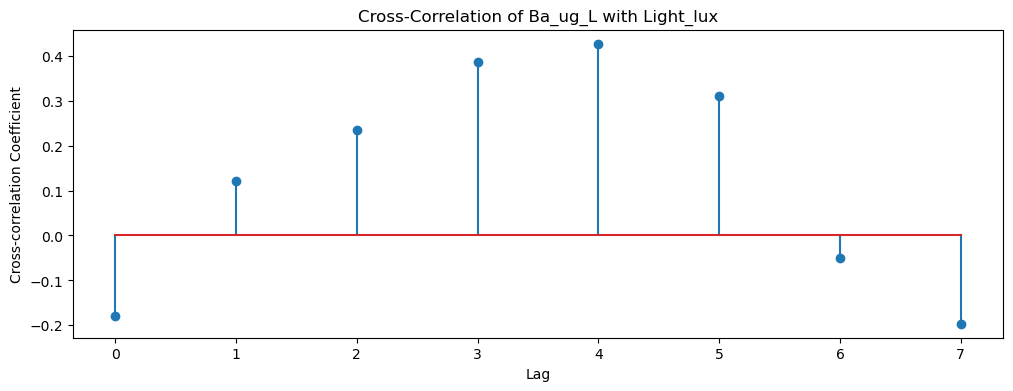

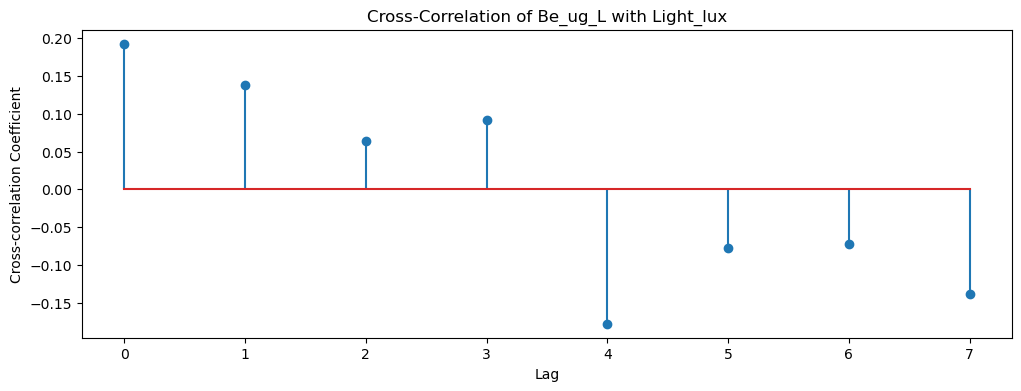

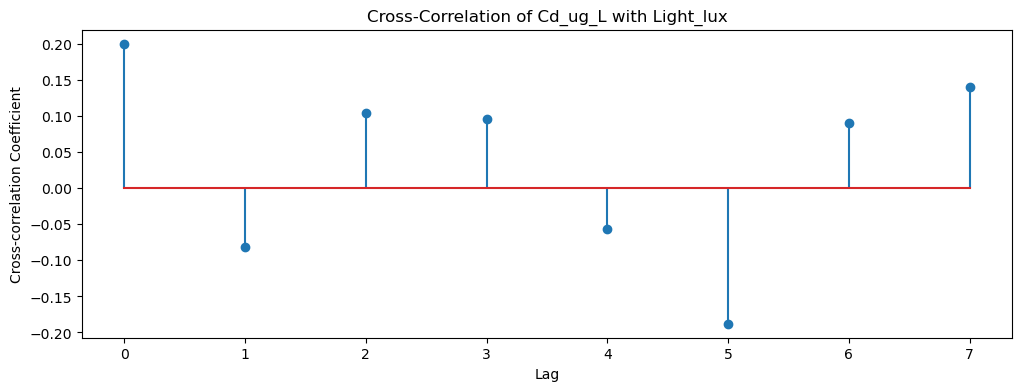

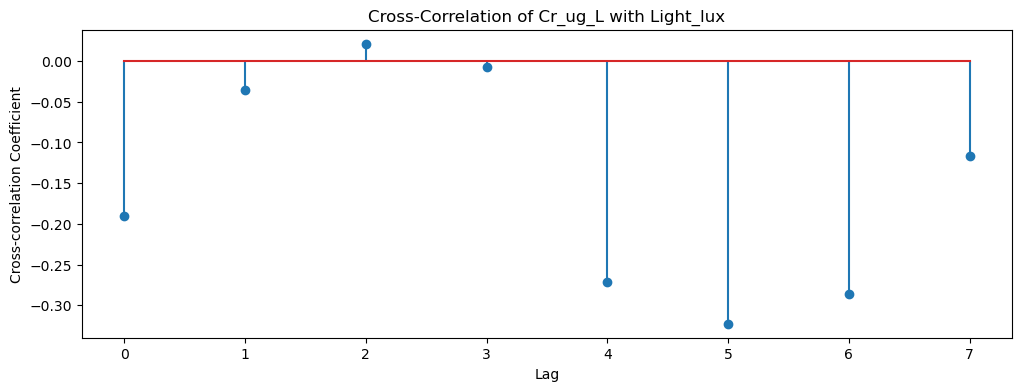

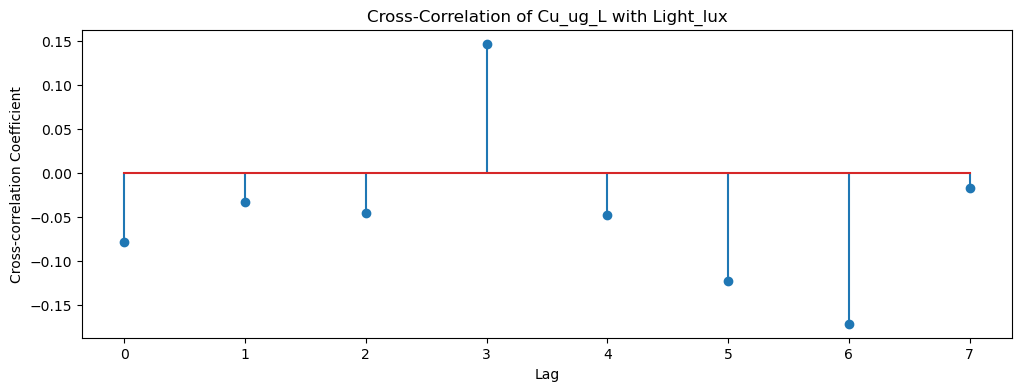

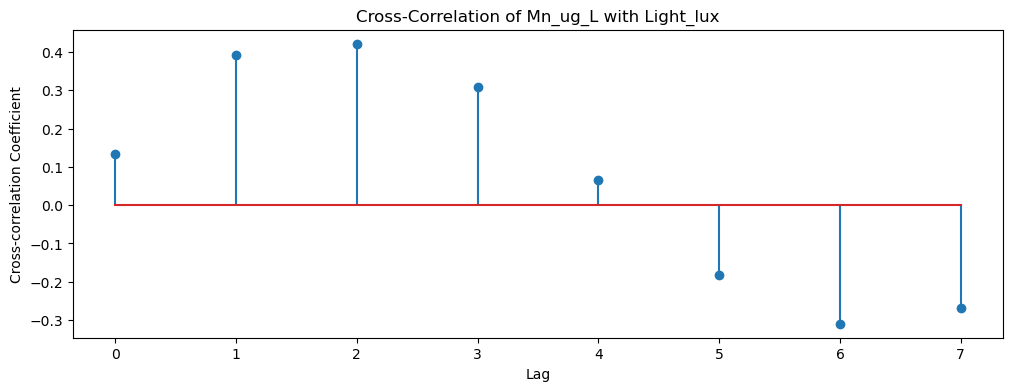

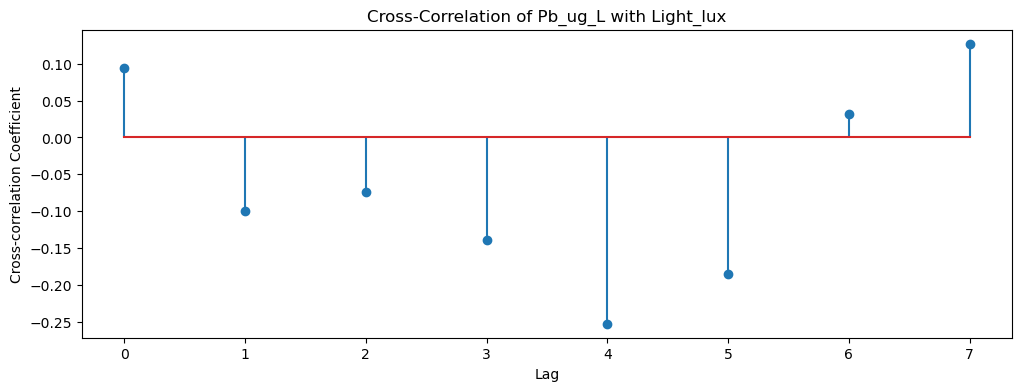

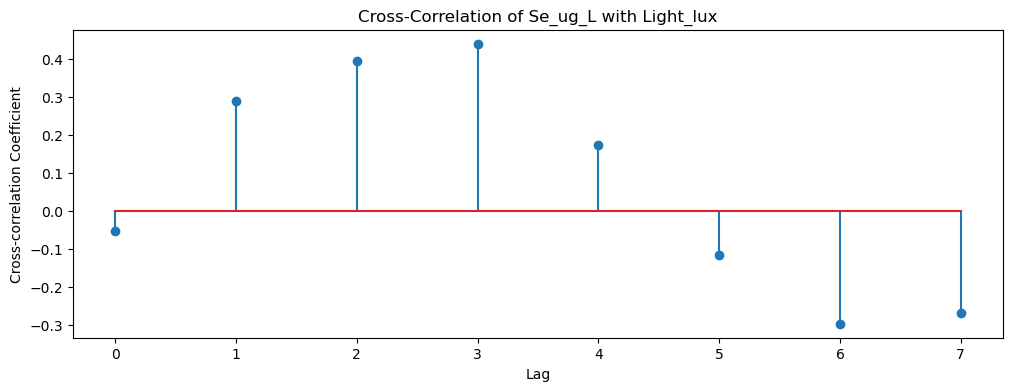

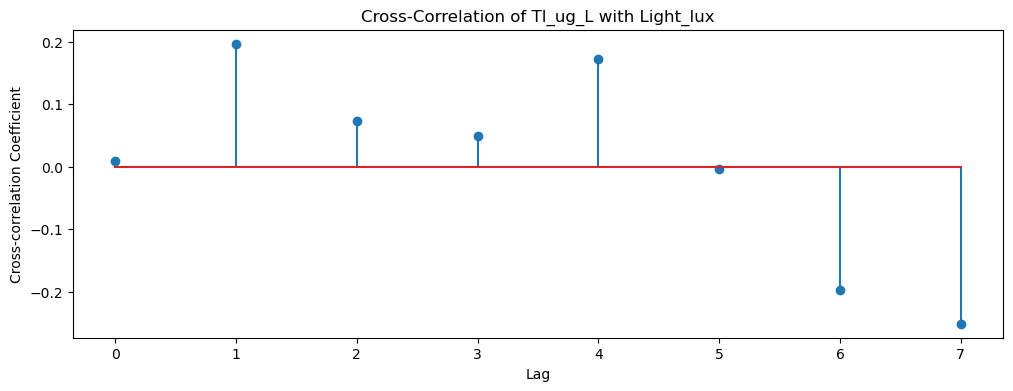

In [19]:
# Function to plot cross-correlation for each variable with Light_lux and save as PNG
def plot_cross_correlation(variable, cross_correlations, png_dir, max_lag):
    plt.figure(figsize=(12, 4))
    plt.stem(range(max_lag), cross_correlations, use_line_collection=True)
    plt.title(f'Cross-Correlation of {variable} with Light_lux')
    plt.xlabel('Lag')
    plt.ylabel('Cross-correlation Coefficient')
    
    # Show the plot as a PNG file
    # png_path = f"{png_dir}{variable}_cross_correlation.png"
    # plt.savefig(png_path)
    plt.show()
    plt.close()
    # return png_path

# Create and save cross-correlation plot for each series
cross_correlation_png_paths = {}
for variable, cross_correlations in cross_correlation_results.items():
    cross_correlation_png_paths[variable] = plot_cross_correlation(variable, cross_correlations, png_dir, max_lag)

# Path for the cross-correlation ZIP file
# cross_correlations_zipfile_path = 'cross_correlations.zip'

# Creating a ZIP file with all the cross-correlation PNG files
# with zipfile.ZipFile(cross_correlations_zipfile_path, 'w') as zipf:
#     for variable, file_path in cross_correlation_png_paths.items():
        # Add each cross-correlation PNG file to the ZIP
#         zipf.write(file_path, os.path.basename(file_path))

# cross_correlations_zipfile_path


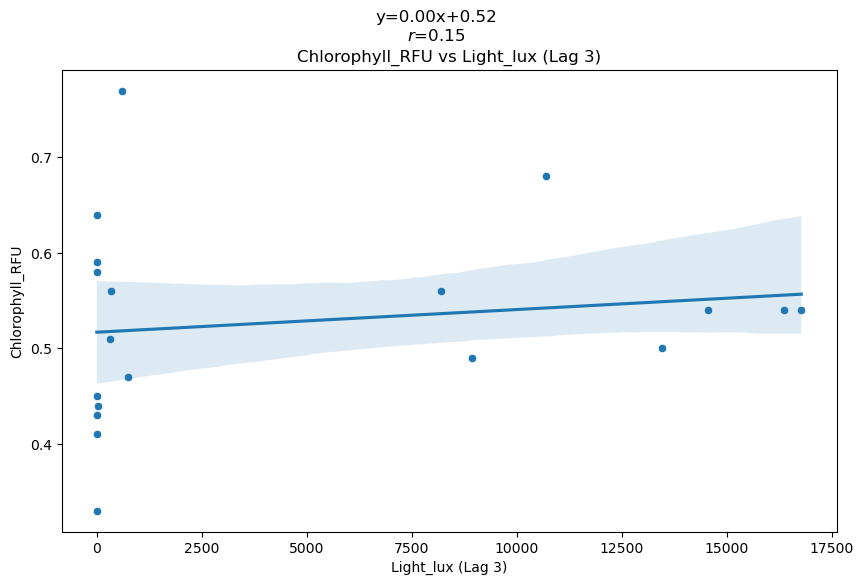

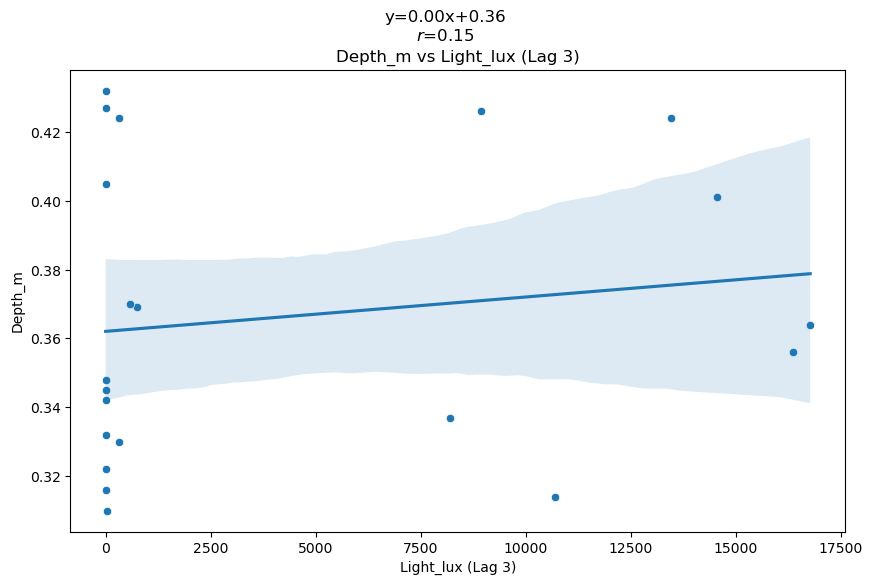

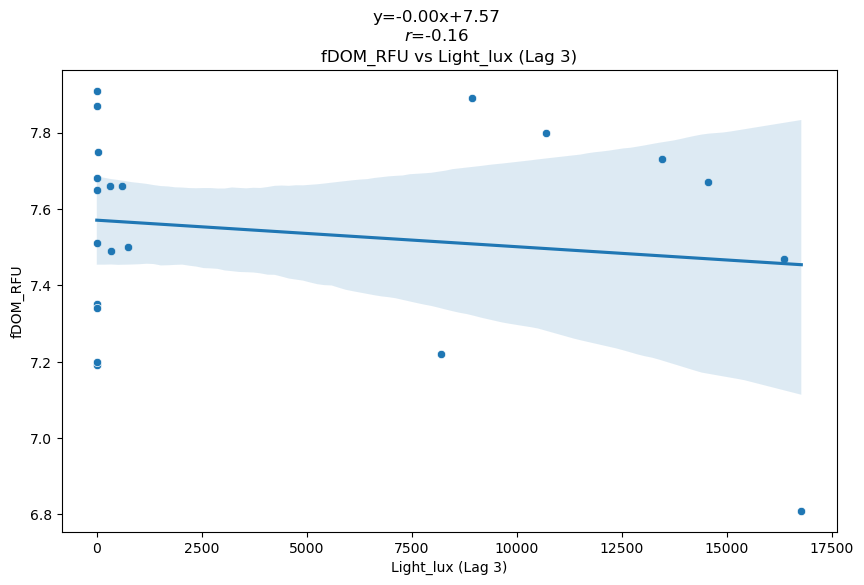

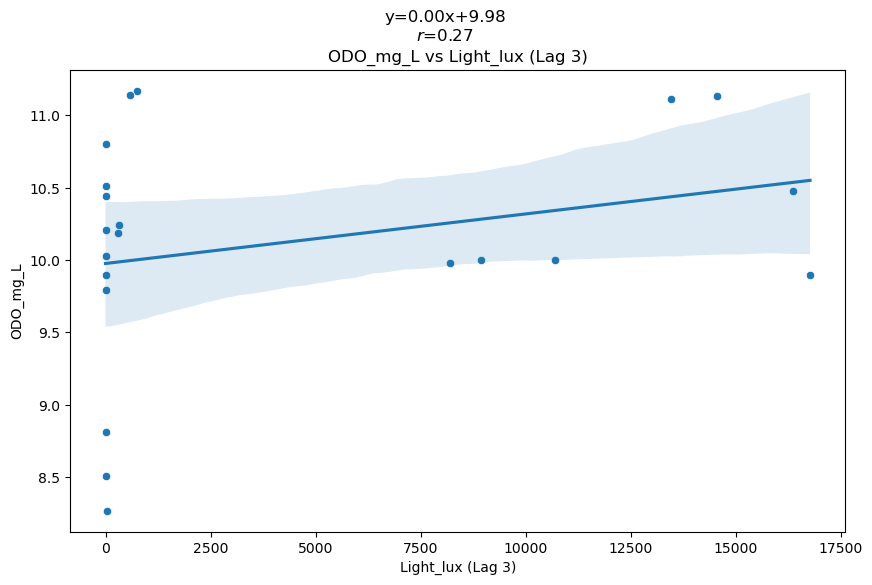

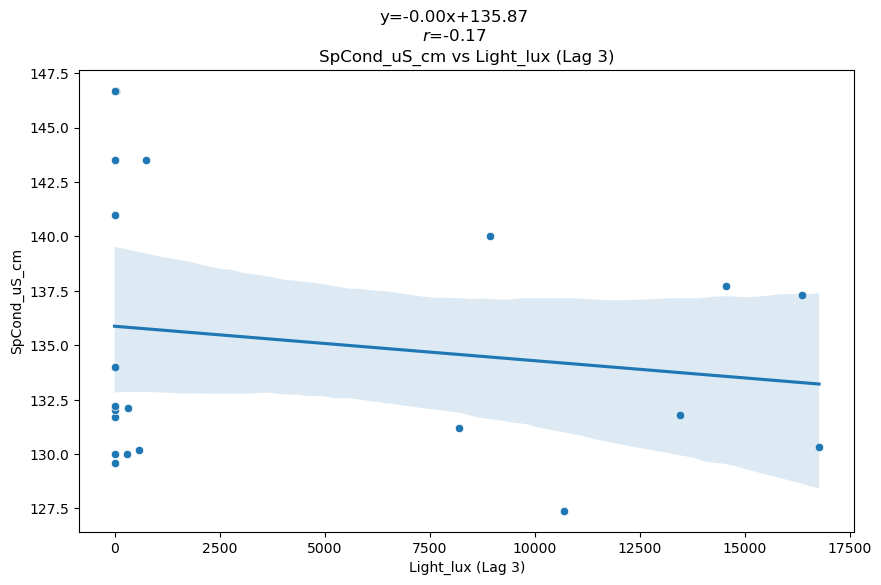

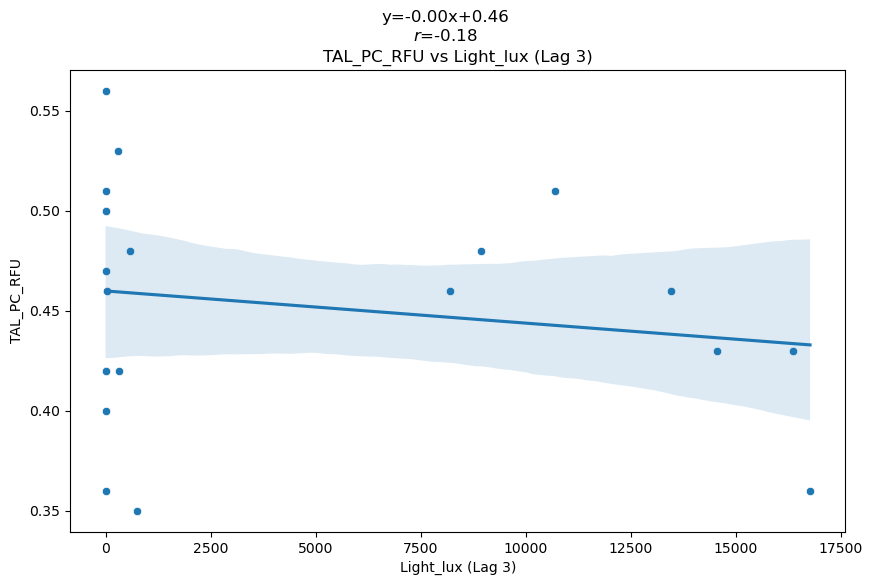

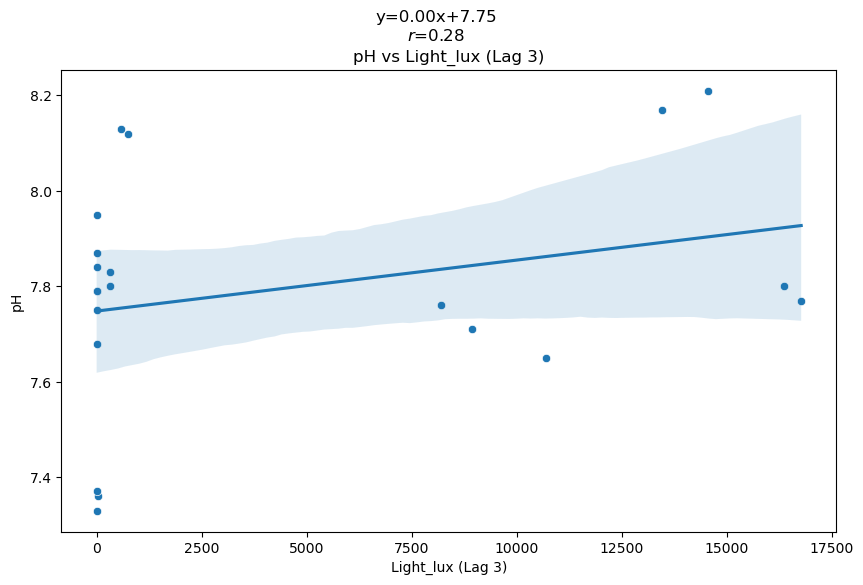

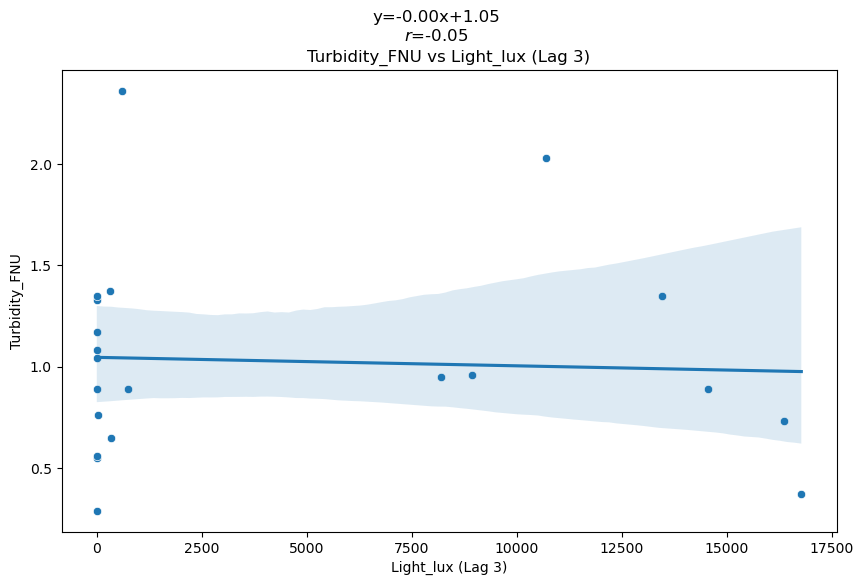

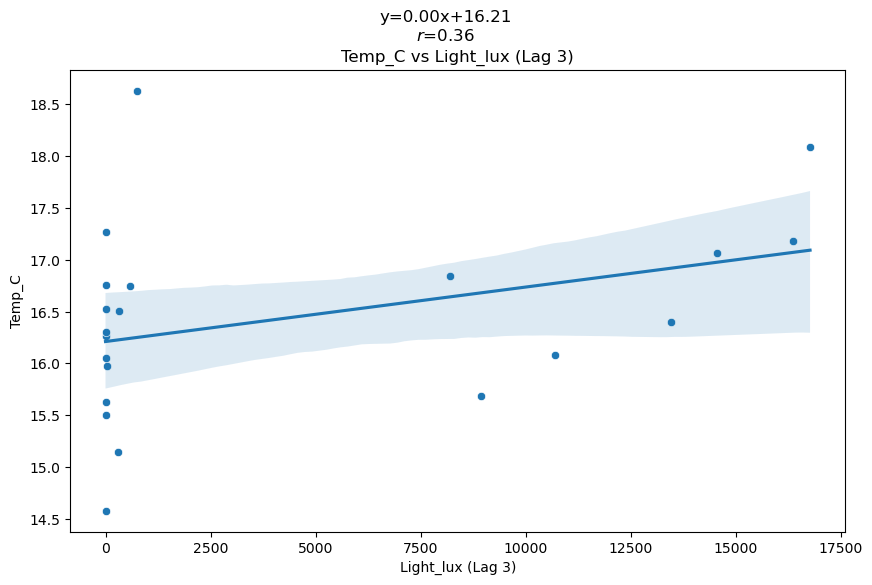

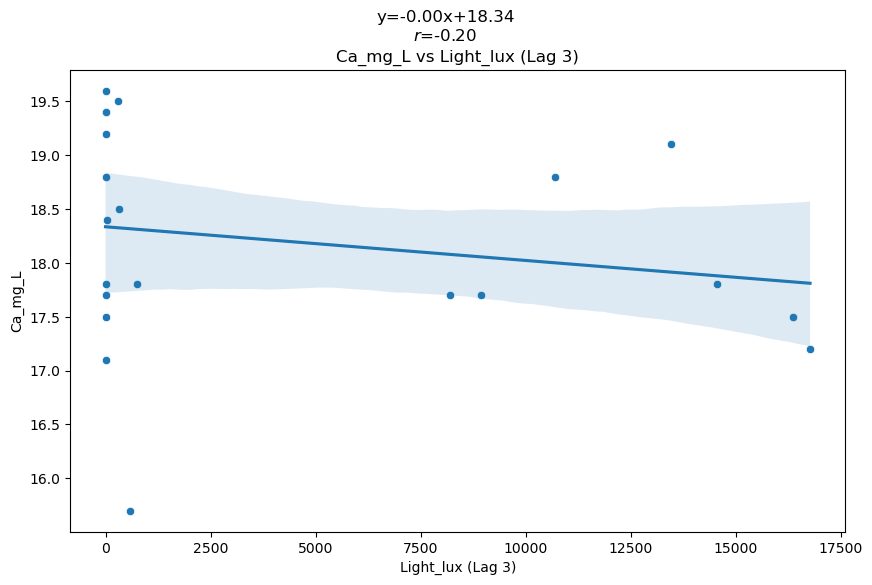

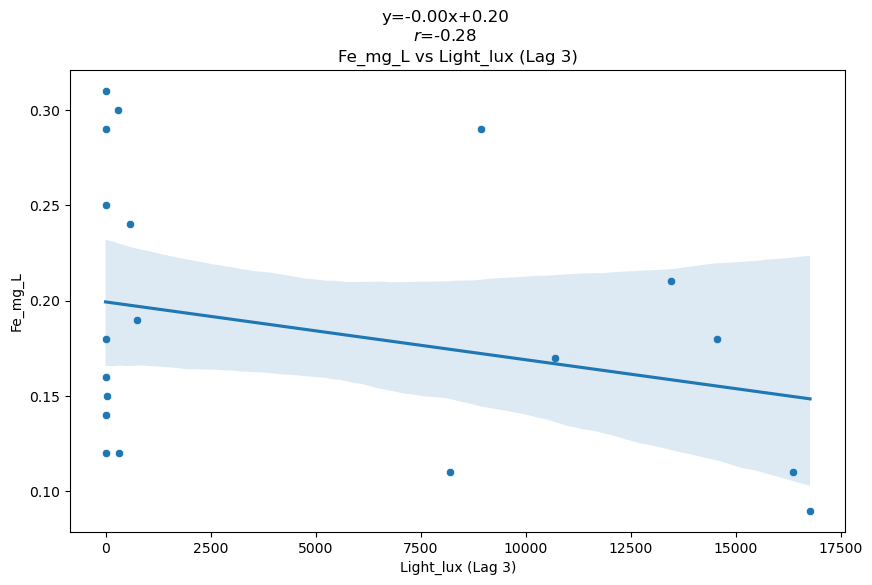

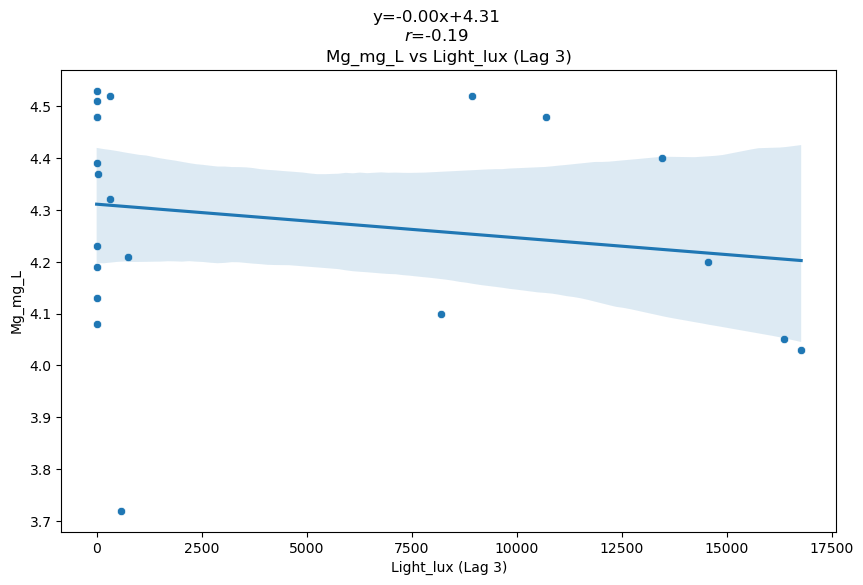

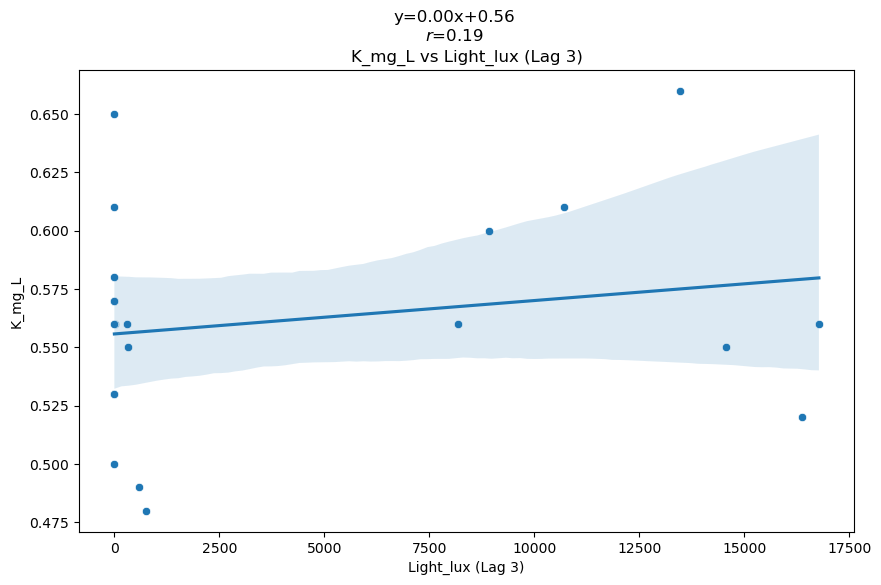

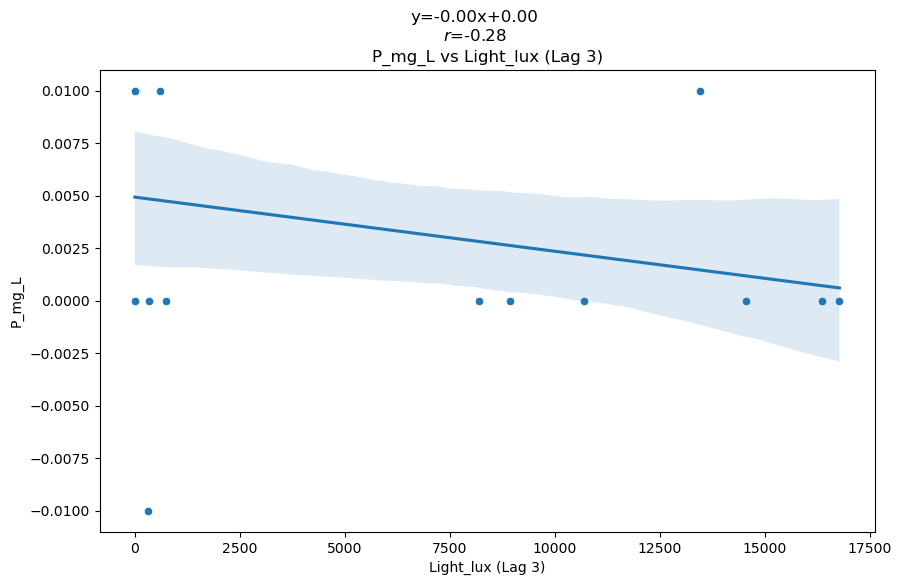

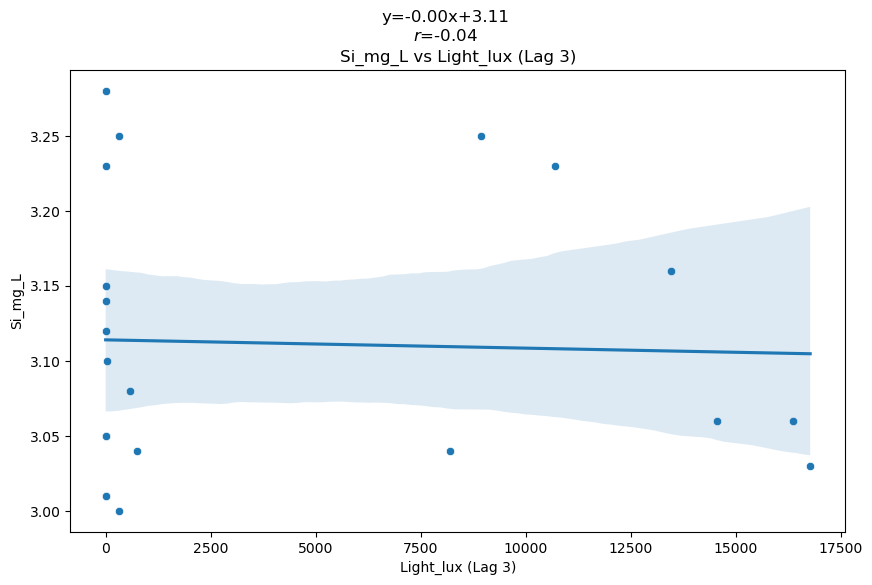

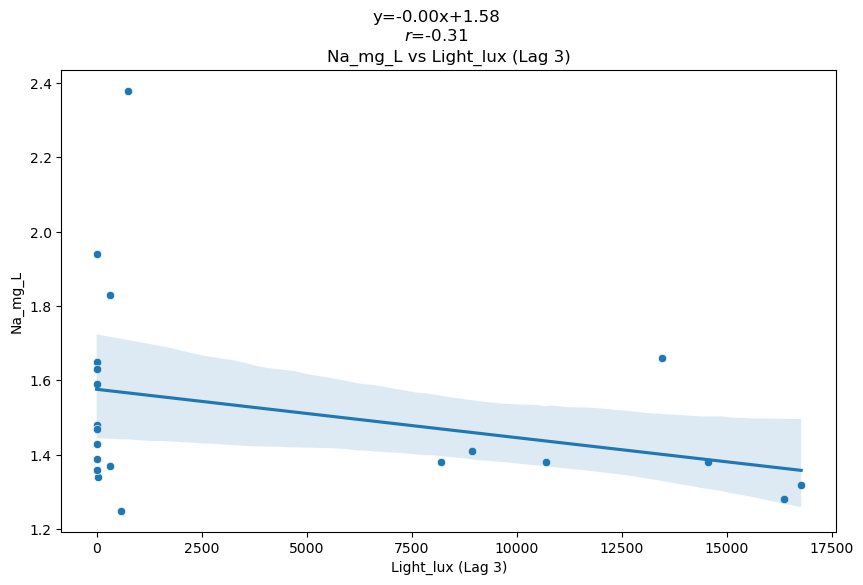

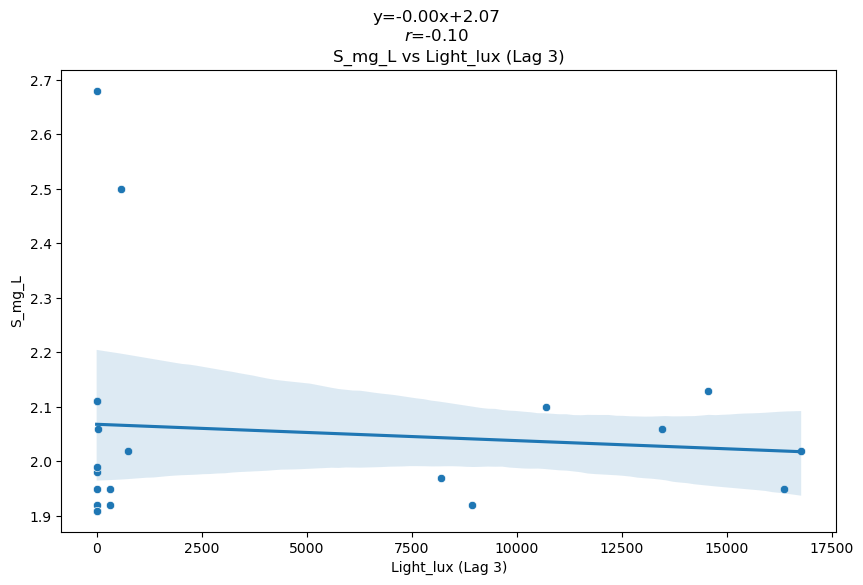

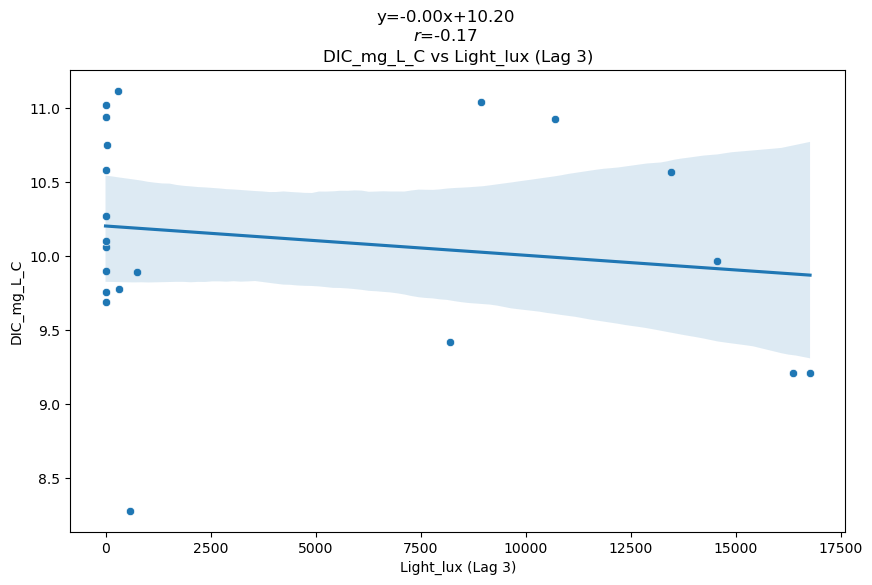

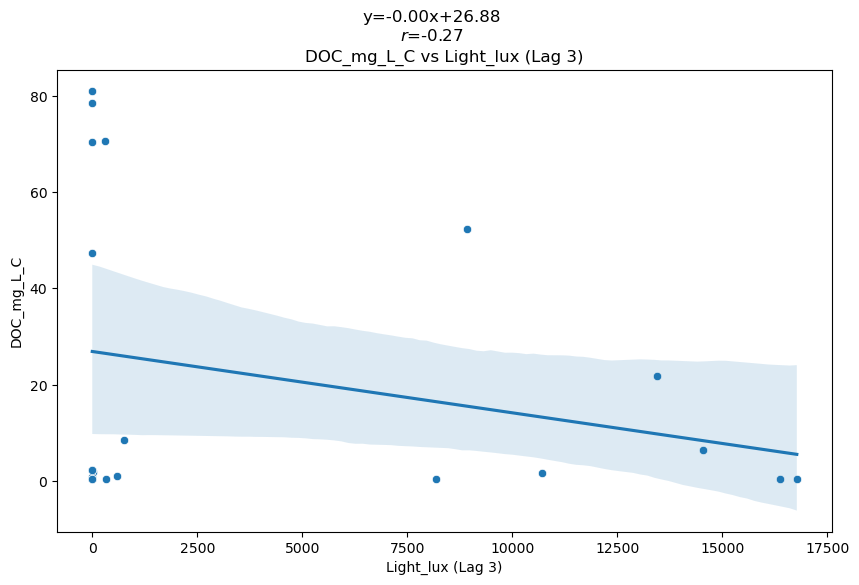

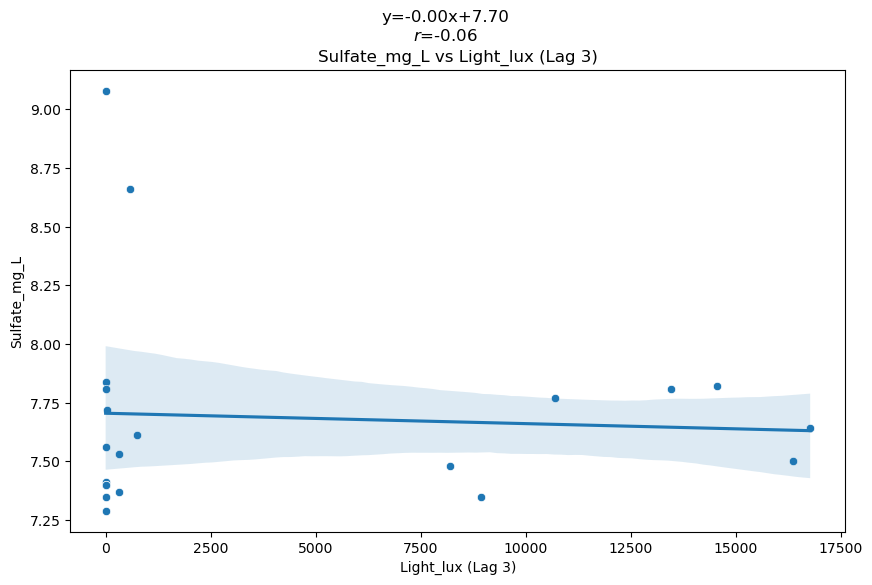

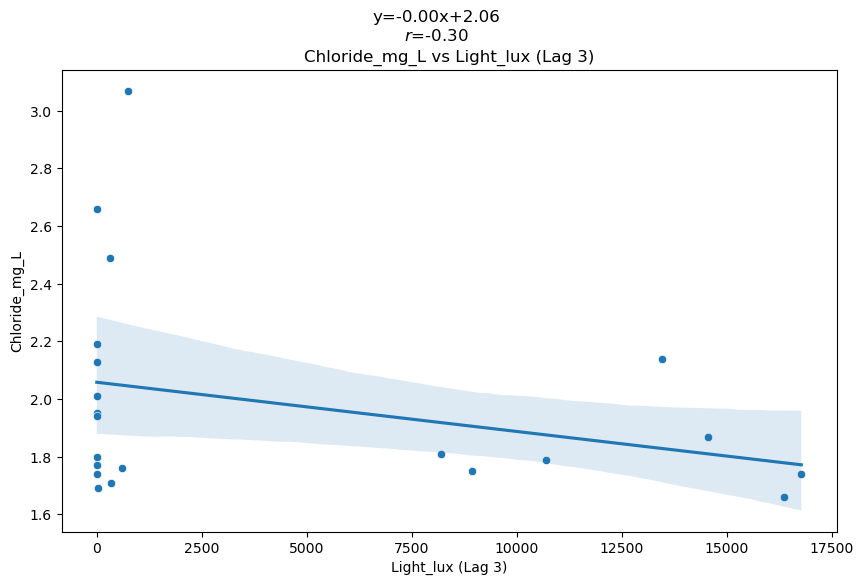

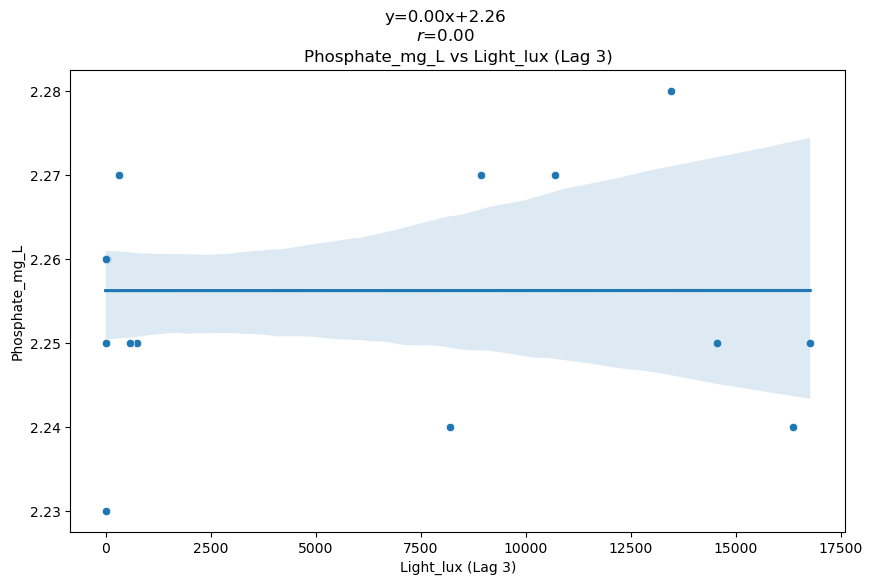

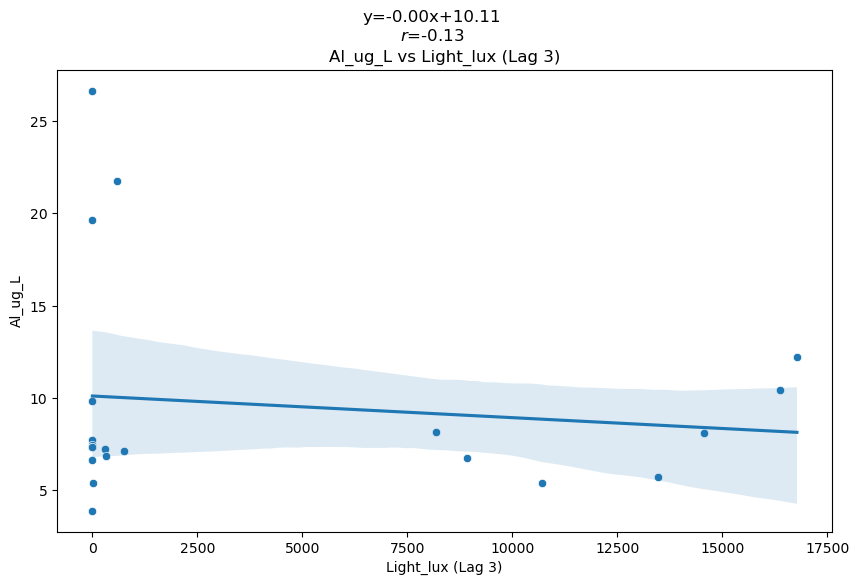

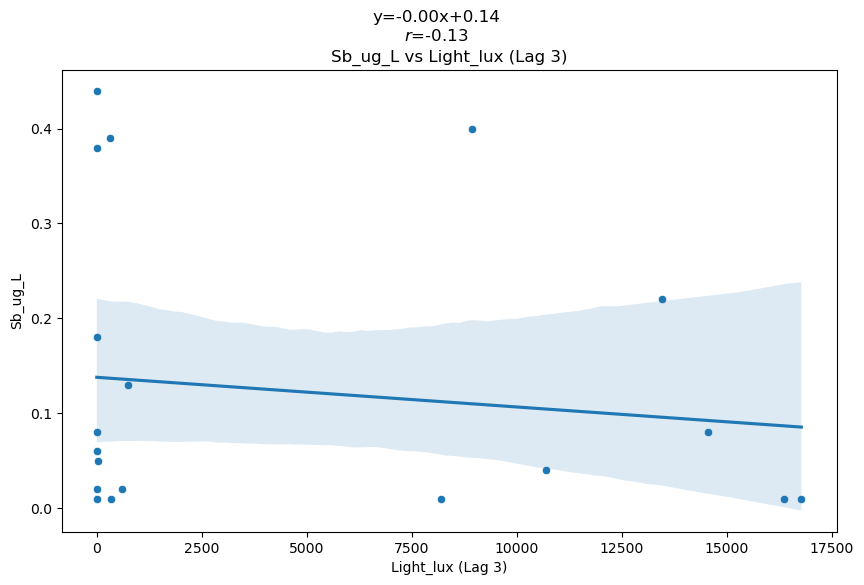

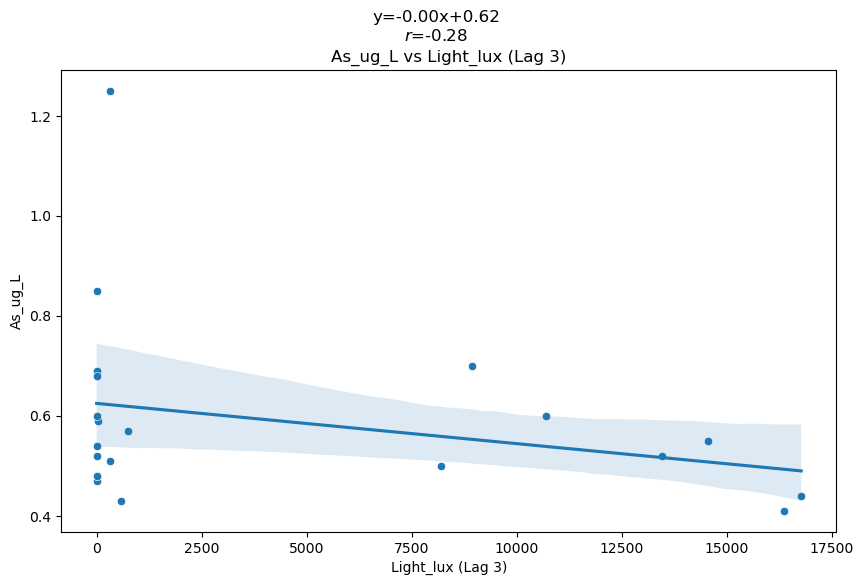

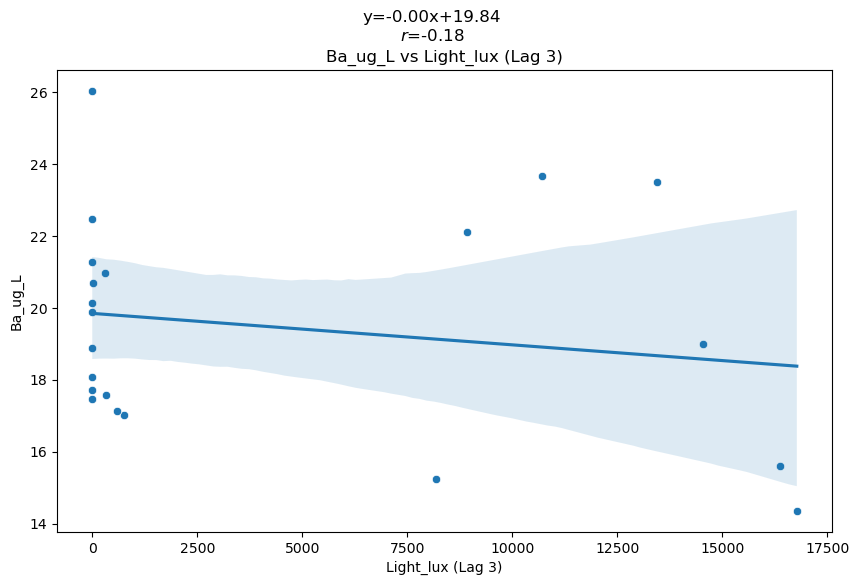

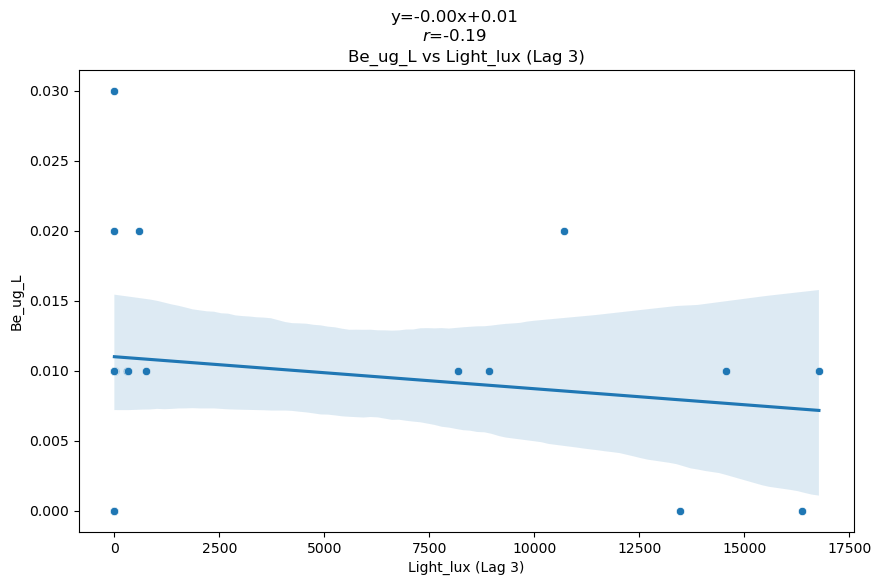

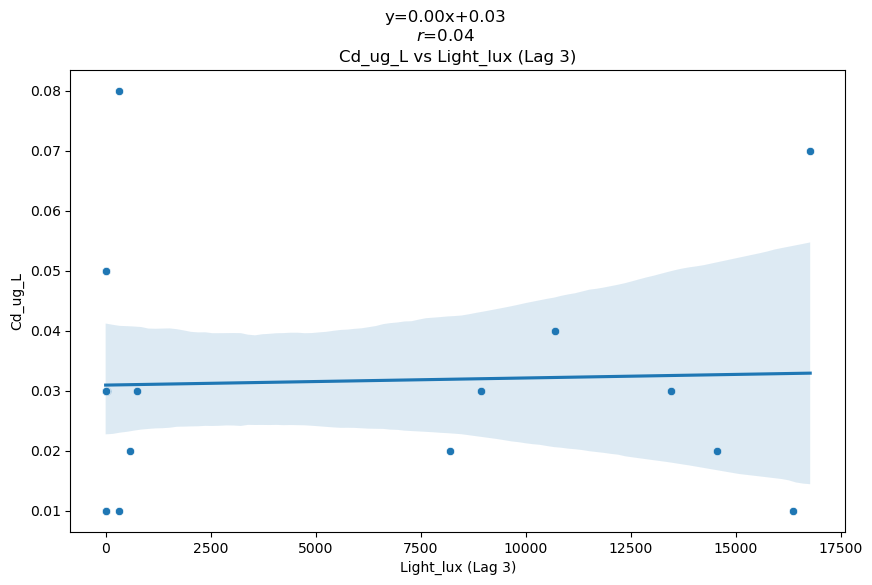

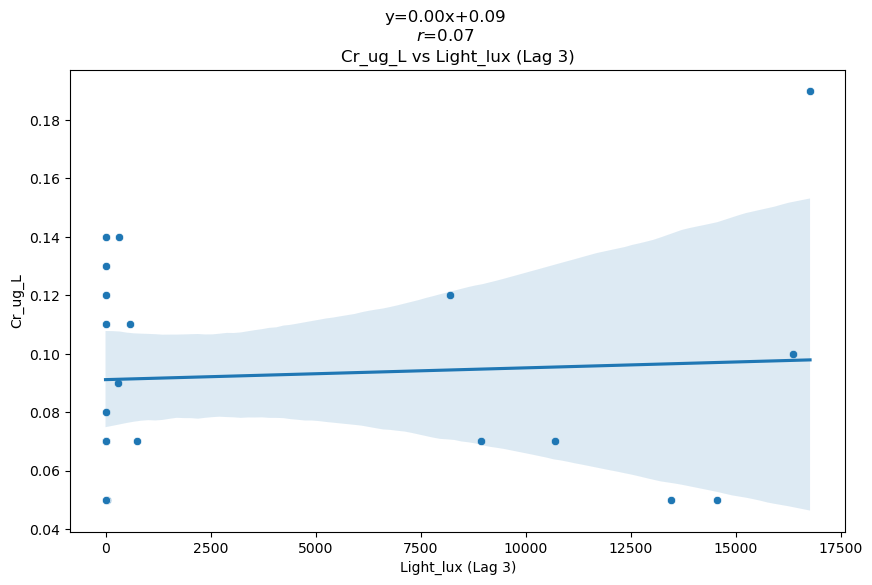

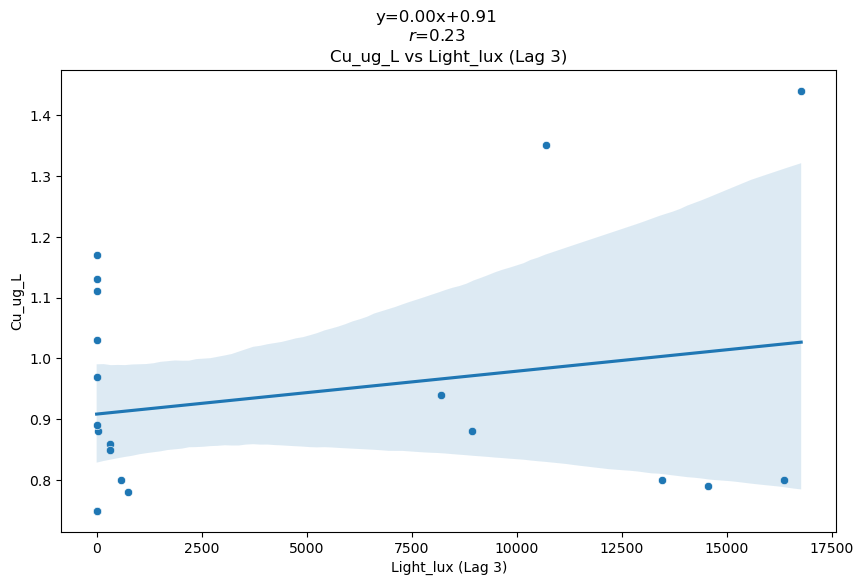

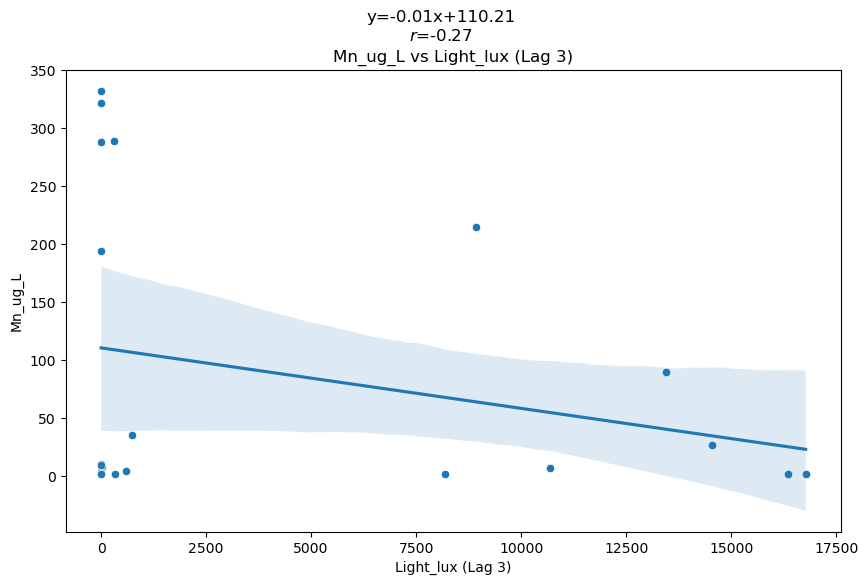

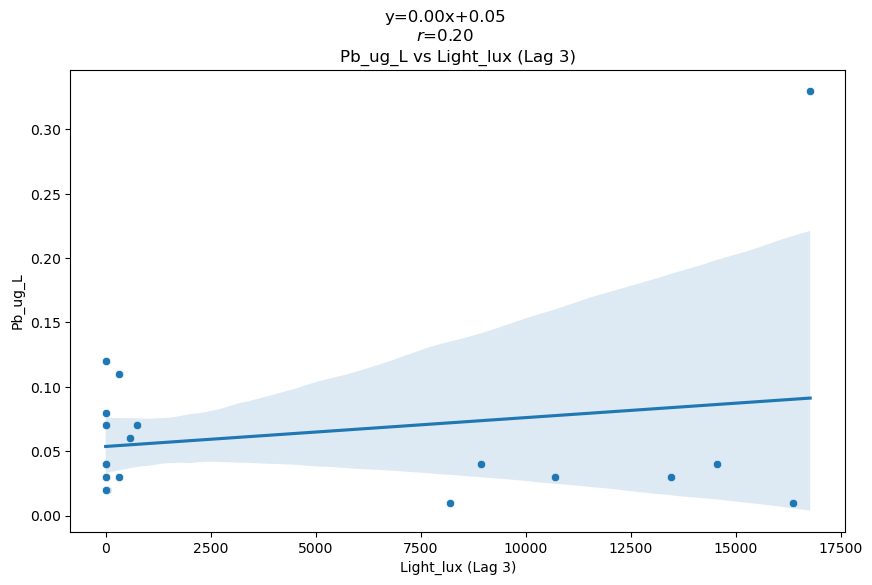

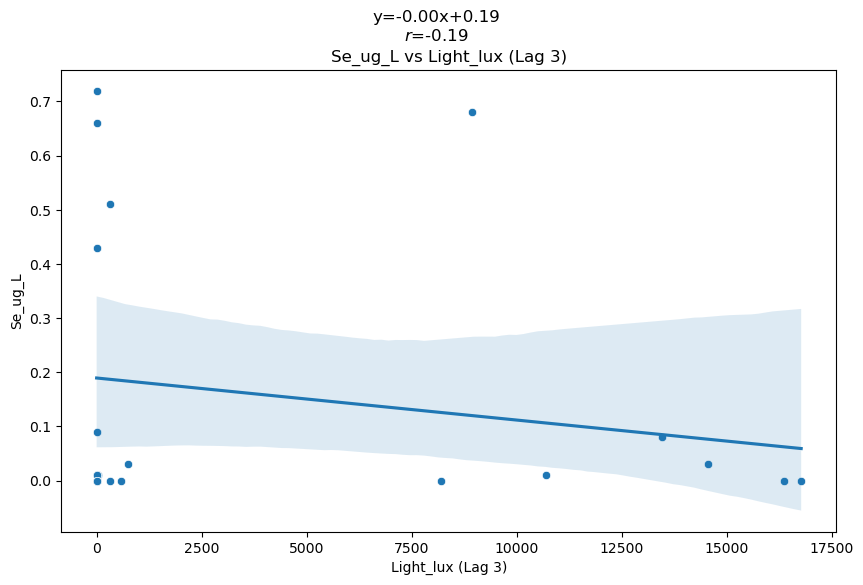

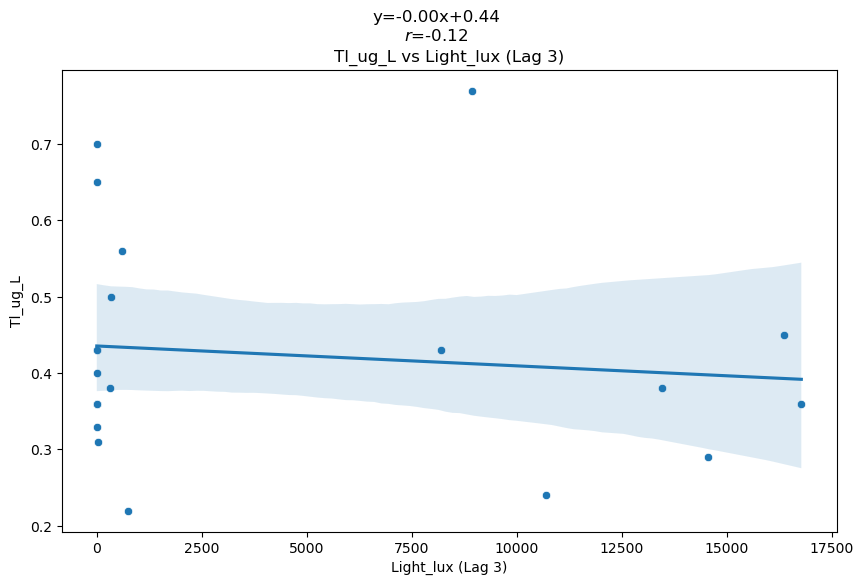

In [15]:
# Function to create scatterplot with regression line for lagged Light_lux
def create_scatterplot_with_lag(x, y, lag, data, variable_name, png_dir):
    # Apply the lag to the Light_lux series
    data['Light_lux_lagged'] = data[x].shift(lag)

    # Drop rows with NaN values resulting from the lag
    lagged_data = data[['Light_lux_lagged', y]].dropna()

    # Perform linear regression on the lagged data
    regression_result = linregress(lagged_data['Light_lux_lagged'], lagged_data[y])
    slope, intercept, r_value, p_value, std_err = regression_result
    line_kws = {'label': f"y={slope:.2f}x+{intercept:.2f}\n$r$={r_value:.2f}"}

    # Create scatterplot
    plt.figure(figsize=(10, 6))
    scatterplot = sns.scatterplot(x='Light_lux_lagged', y=y, data=lagged_data)
    sns.regplot(x='Light_lux_lagged', y=y, data=lagged_data, scatter=False, line_kws=line_kws)

    # Add the regression line equation and the correlation coefficient to the plot
    # scatterplot.legend()
    plt.title(f"{variable_name} vs Light_lux (Lag 3)")
    plt.suptitle(f"y={slope:.2f}x+{intercept:.2f}\n$r$={r_value:.2f}", y=0.98)
    plt.xlabel('Light_lux (Lag 3)')
    plt.ylabel(variable_name)

    # Save the plot as a PNG file
    png_path = f"{png_dir}{variable_name}_vs_Light_lux_lag3.png"
    plt.savefig(png_path)
    plt.show()
    # plt.close()

    return png_path

# Lag value to be applied to Light_lux
lag_value = 3

# Create scatterplots for each series with a lagged Light_lux
scatterplot_png_paths_lag3 = {}
for variable in variables_to_plot:
    scatterplot_png_paths_lag3[variable] = create_scatterplot_with_lag(
        'Light_lux', variable, lag_value, data, variable, png_dir
    )

# Path for the scatterplots with lag ZIP file
scatterplots_lag3_zipfile_path = 'scatterplots_lag3.zip'

# Creating a ZIP file with all the scatterplot PNG files for lagged Light_lux
# with zipfile.ZipFile(scatterplots_lag3_zipfile_path, 'w') as zipf:
#     for variable, file_path in scatterplot_png_paths_lag3.items():
        # Add each scatterplot PNG file to the ZIP
#         zipf.write(file_path, os.path.basename(file_path))

# scatterplots_lag3_zipfile_path